In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import time
import math
from matplotlib.patches import Ellipse
import matplotlib.colors as colors
from matplotlib.ticker import LogFormatterMathtext
from matplotlib.ticker import StrMethodFormatter
import matplotlib.lines as lines
from pylab import fromfile
from multiprocessing import Pool
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import curl
from sympy import diff
import shutil
from matplotlib import rcParams as rc

In [1]:
pwd

'/tiara/ara/data/vle'

In [2]:
labelsize = 15
rc['xtick.labelsize'] = labelsize
rc['ytick.labelsize'] = labelsize

### To make movie: ffmpeg -framerate 10 -i density_%d.png -c:v libx264 -vf "scale=1280:trunc(ow/a/2)*2" -r 30 -pix_fmt yuv420p movie.mp4

### To make movie: ffmpeg -framerate 10 -i density_%d.png -c:v libx264 -vf "scale=1280:trunc(ow/a/2)*2,select='not(mod(n,10))’,setpts=N/10/TB" -r 30 -pix_fmt yuv420p movie.mp4

https://superuser.com/questions/1156837/using-every-nth-image-in-sequence-to-create-video-using-ffmpeg

In [3]:
path_torque = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_torque1/'
path_b0     = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_b0/'
path_b0_modified = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_b0_modified/'
path_nu_e5  = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_nu_e5/'
path_nu_b0  = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_nu_b0/'
path_tap_b0 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_b0/'
path_tap_b1 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_b1/'
path_tap_e3 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_e3/'
path_tap_e4 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_e4/'
path_tap_e5 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_e5/'
path_tap_e6 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_e6/'
path_tap_e7 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_e7/'

path_tap_wind_b0 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_wind_b0/'
path_tap_wind_e3 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_wind_e3/'
path_tap_wind_e4 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_wind_e4/'
path_tap_wind_e5 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_wind_e5/'
path_tap_wind_e6 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_wind_e6/'
path_tap_wind_test_r3 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tap_wind_test_r3/'

path_tapwind_np_05 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tapwind_np_05/'
path_tapwind_np_1  = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tapwind_np_1/'
path_tapwind_np_15 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_tapwind_np_15/'

path_tapwind_jup_e3 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_tapwind_jup_e3/'
path_tapwind_jup_e4 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_tapwind_jup_e4/'
path_tapwind_jup_e5 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_tapwind_jup_e5/'
path_tapwind_jup_e6 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_tapwind_jup_e6/'

path_tapwind_sat_e3 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_tapwind_sat_e3/'
path_tapwind_sat_e4 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_tapwind_sat_e4/'
path_tapwind_sat_e5 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_tapwind_sat_e5/'
path_tapwind_sat_e6 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_tapwind_sat_e6/'

path_halfsat_e3 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_halfsat_e3/'
path_halfsat_e4 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_halfsat_e4/'
path_halfsat_e5 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_halfsat_e5/'

path_wind_e3 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_wind_e3_new/'
path_wind_e4 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_wind_e4/'
path_wind_e5 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_wind_e5/'
path_wind_e6 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_wind_e6/'
path_no_wind_e3 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_no_wind_e3/'

path_torque_slope_05 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_torque_slope_05/'
path_torque_slope_1 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_torque_slope_1/'
path_torque_slope_15 = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_torque_slope_15/'

path  = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/asiaa_'
pathu = '/tiara/ara/data/vle/fargo3d-2.01/fargo3d-2.01/outputs/update_'
paths = '/tiara/ara/data/vle/save_output/'
paths_comb = '/tiara/ara/data/vle/save_output/combination/'
pathu_comb = '/tiara/ara/data/vle/save_output/comb_update/'

### 512, 512

In [4]:
phi_dat = np.loadtxt(f'{path_torque}domain_x.dat')
rad_dat  = np.loadtxt(f'{path_torque}domain_y.dat')[3:-3]

phi = 2.*np.pi*np.linspace(0,1,len(phi_dat)-1) - np.pi/2.
rad   = 0.5*(rad_dat[:-1] + rad_dat[1:])     #take out 

print(rad_dat.shape)
print(rad.shape)
print(rad_dat[0])
print(rad[0])
print((rad_dat[:-1] + rad_dat[1:]).shape)

nx = len(phi)
ny = len(rad)

P, R = np.meshgrid(phi, rad)
X = R*np.cos(P)
Y = R*np.sin(P)

diff_rad = np.diff(rad_dat)
diff_phi = np.diff(phi_dat)

rad2di = np.tile(rad,(ny,1))
rad2di = np.swapaxes(rad2di,0,1)

rad2d = np.tile(diff_rad,(ny,1))
rad2d = np.swapaxes(rad2d,0,1)
phi2d = np.tile(diff_phi,(nx,1))
phi2d = np.swapaxes(phi2d,0,1)

omega = np.sqrt(1/rad2di**3)

rhog_i = fromfile(f'{path_torque}gasdens0.dat').reshape(ny,nx)    
rhod_i = fromfile(f'{path_torque}dust1dens0.dat').reshape(ny,nx)

toq = fromfile(f'{path_torque}gasdens1000.dat').reshape(ny,nx)

(513,)
(512,)
0.2
0.20537109375
(512,)


### 1024, 2048

In [4]:
phi_dat = np.loadtxt(f'{path_tapwind_jup_e3}domain_x.dat')
rad_dat  = np.loadtxt(f'{path_tapwind_jup_e3}domain_y.dat')[3:-3]

phi = 2.*np.pi*np.linspace(0,1,len(phi_dat)-1) - np.pi/2.
rad   = 0.5*(rad_dat[:-1] + rad_dat[1:])     #take out 

print(rad_dat.shape)
print(rad.shape)
print(rad_dat[0])
print(rad[0])
print((rad_dat[:-1] + rad_dat[1:]).shape)

nx = len(phi)
ny = len(rad)

P, R = np.meshgrid(phi, rad)
X = R*np.cos(P)
Y = R*np.sin(P)

diff_rad = np.diff(rad_dat)
diff_phi = np.diff(phi_dat)

rad2di = np.tile(rad,(ny,1))
rad2di = np.swapaxes(rad2di,0,1)

rad2d = np.tile(diff_rad,(ny,1))
rad2d = np.swapaxes(rad2d,0,1)
phi2d = np.tile(diff_phi,(nx,1))
phi2d = np.swapaxes(phi2d,0,1)

omega = np.sqrt(1/rad2di**3)

rhog_i = fromfile(f'{path_tapwind_jup_e3}gasdens0.dat').reshape(ny,nx)    
rhod_i = fromfile(f'{path_tapwind_jup_e3}dust1dens0.dat').reshape(ny,nx)

(1025,)
(1024,)
0.4
0.40126953125000003
(1024,)


In [14]:
# toq = np.loadtxt(f'{path}gasdens1000.dat')

In [17]:
print(toq.shape)

(512, 512)


In [17]:
nf = 750

rhog_i = pl.fromfile(path+'gasdens0.dat').reshape(ny,nx) 
rhod_i = pl.fromfile(path+'dust1dens0.dat').reshape(ny,nx) 

rhog   = pl.fromfile(path+'gasdens'+str(nf)+'.dat').reshape(ny,nx) 
rhod1   = pl.fromfile(path+'dust1dens'+str(nf)+'.dat').reshape(ny,nx) 

gas = rhog/rhog_i
dust1 = rhod1/rhod_i

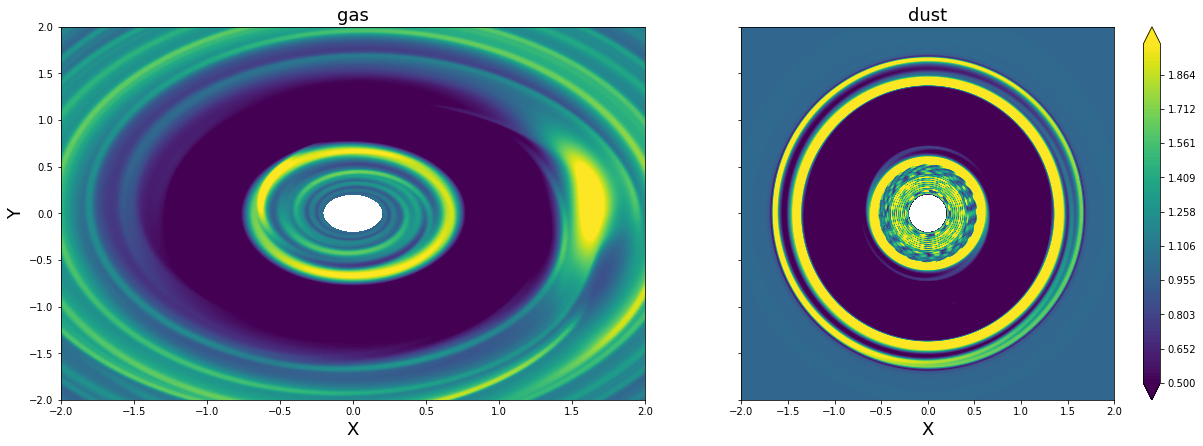

In [16]:
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(17,6), sharey=True)

toplot = rhog/rhog_i
botplot= rhod1/rhod_i

r = 2
vmin = 0.5
vmax = 2
levels = np.linspace(vmin,vmax,100)

ax.set_title('gas', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_xlabel('X', fontsize=18)
im = ax.contourf(X, Y, toplot, levels, extend='both')
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)
ax1.set_aspect('equal')

ax1.set_title('dust', fontsize=18)
# ax1.set_ylabel('Y', fontsize=18)
ax1.set_xlabel('X', fontsize=18)
im = ax1.contourf(X, Y, botplot, levels, extend='both')
ax1.set_xlim(-r,r)
ax1.set_ylim(-r,r)
ax1.set_aspect('equal')

# fig.colorbar(im, ax=ax)
fig.colorbar(im, ax=ax1)
fig.tight_layout(pad=0.0)

In [4]:
def gdplot(param):
    fpath, path, name, nf = param
    
    rhog_i = pl.fromfile(f'{fpath}{name}/gasdens0.dat').reshape(ny,nx) 
    rhod_i = pl.fromfile(f'{fpath}{name}/dust1dens0.dat').reshape(ny,nx) 
    
    rhog   = pl.fromfile(f'{fpath}{name}/gasdens{nf}.dat').reshape(ny,nx) 
    rhod1   = pl.fromfile(f'{fpath}{name}/dust1dens{nf}.dat').reshape(ny,nx) 
    
    arr  = [rhog/rhog_i, rhod1/rhod_i]
    
    r = 3
#     vmin = 0.5
#     vmax = 2
#     levels = np.linspace(vmin,vmax,100)

    vmins = [0 , 0]
    vmaxs = [2, 10]
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6), sharey=True)
    
    for i, vmin, vmax, ax in zip(arr, vmins, vmaxs, axes.flat):
        
        levels = np.linspace(vmin,vmax,100)
        
        im = ax.contourf(X, Y, i, levels, extend='both')
        ax.set_xlim(-r,r)
        ax.set_ylim(-r,r)
        ax.set_aspect('equal')

        formatter = StrMethodFormatter('${x:0.2f}$')
        cbar = fig.colorbar(im, ax=ax, format=formatter)
        
    axes[0].set_title(f'gas: {nf}', fontsize=18)
    axes[1].set_title(f'dust: {nf}', fontsize=18)
    axes[0].set_ylabel('Y', fontsize=18)
    axes[0].set_xlabel('X', fontsize=18)
    axes[1].set_xlabel('X', fontsize=18)  
    cbar.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)
    
#     formatter = StrMethodFormatter('${x:0.2f}$')
#     cbar = fig.colorbar(im, ax=axes[0], format=formatter)
#     cbar.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)
#     cbar1 = fig.colorbar(im, ax=axes[1], format=formatter)
#     cbar1.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)

    plt.savefig(f'{path}{name}/densmap_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch
    plt.close()

In [11]:
########### It took 30 minutes to run this cell ###########

name = ['tap_wind_e3', 'tap_wind_e4', 'tap_wind_e5', 'tap_wind_e6', 'wind_e3', 'wind_e4', 'wind_e5', 'wind_e6']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 1001)
    params = [(path, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        gdplot(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(gdplot, params)
            p.terminate()
        else:
            for param in params:
                gdplot(param)

In [7]:
name = ['tapwind_np_05', 'tapwind_np_1', 'tapwind_np_15']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 1001)
    params = [(path, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        gdplot(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(gdplot, params)
            p.terminate()
        else:
            for param in params:
                gdplot(param)

In [8]:
name = ['tapwind_jup_e3']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 1701)
    params = [(pathu, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        gdplot(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(gdplot, params)
            p.terminate()
        else:
            for param in params:
                gdplot(param)

In [9]:
name = ['tapwind_jup_e4']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 501)
    params = [(pathu, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        gdplot(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(gdplot, params)
            p.terminate()
        else:
            for param in params:
                gdplot(param)

In [10]:
name = ['tapwind_sat_e3']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 761)
    params = [(pathu, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        gdplot(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(gdplot, params)
            p.terminate()
        else:
            for param in params:
                gdplot(param)

In [11]:
name = ['tapwind_sat_e4']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 2601)
    params = [(pathu, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        gdplot(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(gdplot, params)
            p.terminate()
        else:
            for param in params:
                gdplot(param)

In [7]:
# input for parallel jobs for MassTaper with e3
num_cores = 12
frame_range = range(0, 1001)
params = [(path, paths, 'wind_e3_new/', nf) for nf in frame_range]

# Iterate through frames
if len(frame_range) == 1:
    gdplot(params[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(gdplot, params)
        p.terminate()
    else:
        for param in params:
            gdplot(param)

In [6]:
# input for parallel jobs for MassTaper with wind e3
num_cores = 12
frame_range = range(0, 1001)
params = [(path_tap_wind_e3, paths, 'tap_wind_e3/', nf) for nf in frame_range]

# Iterate through frames
if len(frame_range) == 1:
    gdplot(params[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(gdplot, params)
        p.terminate()
    else:
        for param in params:
            gdplot(param)

In [72]:
def gdplot(fpath, nf):
#     fpath, path, name, nf = param
    
    rhog_i = pl.fromfile(f'{fpath}gasdens0.dat').reshape(ny,nx) 
    rhod_i = pl.fromfile(f'{fpath}dust1dens0.dat').reshape(ny,nx) 
    
    rhog   = pl.fromfile(f'{fpath}gasdens{nf}.dat').reshape(ny,nx) 
    rhod1   = pl.fromfile(f'{fpath}dust1dens{nf}.dat').reshape(ny,nx) 
    
    arr  = [rhog/rhog_i, rhod1/rhod_i]
    
    r = 2
#     vmin = 0.5
#     vmax = 2
#     levels = np.linspace(vmin,vmax,100)

    vmins = [0 , 0]
    vmaxs = [2, 10]
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6), sharey=True)
    
    for i, vmin, vmax, ax in zip(arr, vmins, vmaxs, axes.flat):
        
        levels = np.linspace(vmin,vmax,100)
        
        im = ax.contourf(X, Y, i, levels, extend='both')
        ax.set_xlim(-r,r)
        ax.set_ylim(-r,r)
        ax.set_aspect('equal')

        formatter = StrMethodFormatter('${x:0.2f}$')
        cbar = fig.colorbar(im, ax=ax, format=formatter)
        
    axes[0].set_title(f'gas: {nf}', fontsize=18)
    axes[1].set_title(f'dust: {nf}', fontsize=18)
    axes[0].set_ylabel('Y', fontsize=18)
    axes[0].set_xlabel('X', fontsize=18)
    axes[1].set_xlabel('X', fontsize=18)  
    cbar.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)

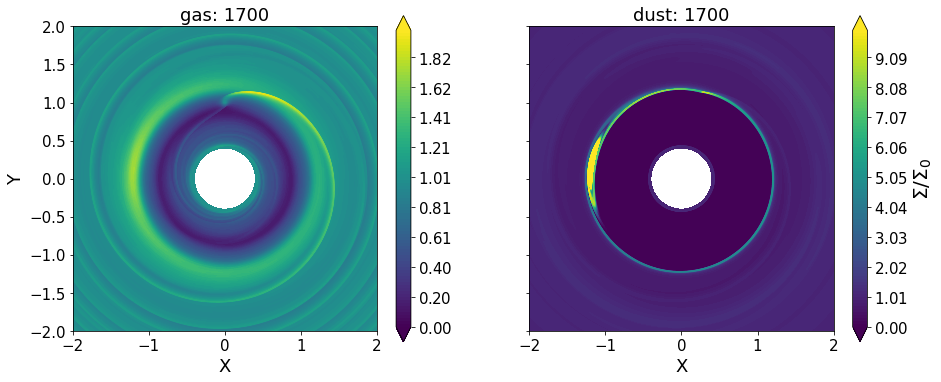

In [73]:
gdplot(path_halfsat_e4, '1700')

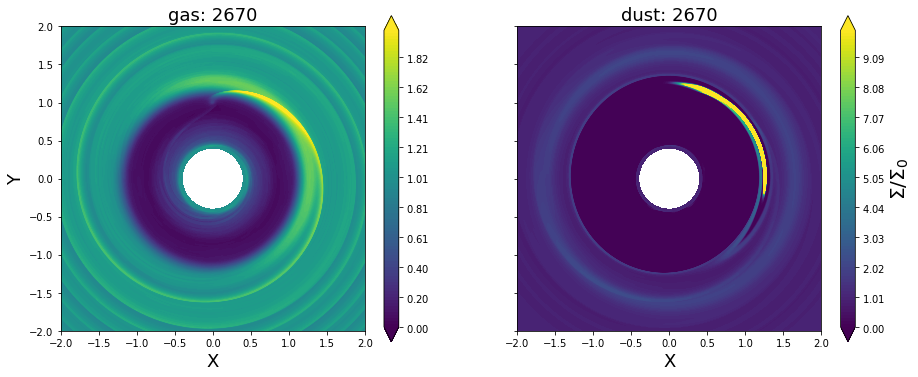

In [59]:
gdplot(path_tapwind_sat_e4, '2672')

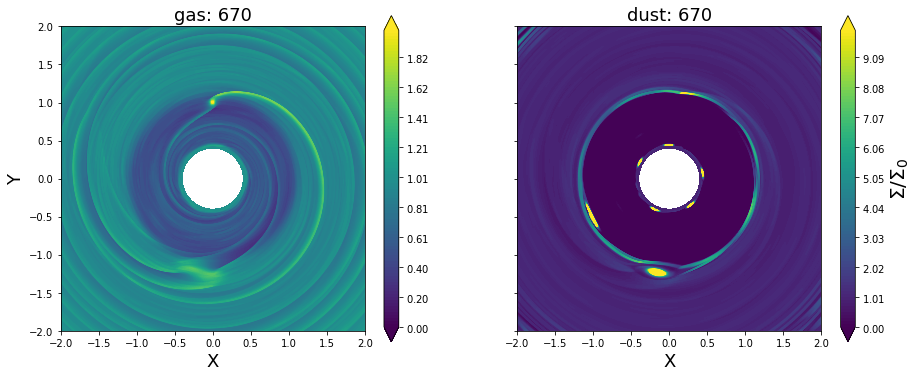

In [117]:
gdplot(path_tapwind_sat_e3, '670')

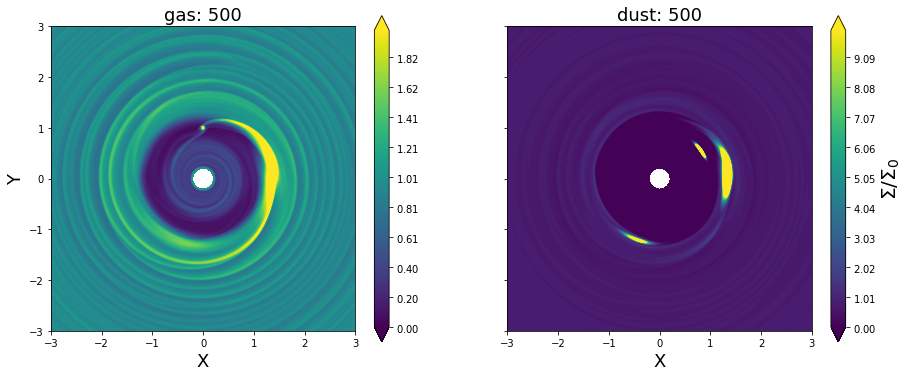

In [13]:
gdplot(path_tap_e3, '500')

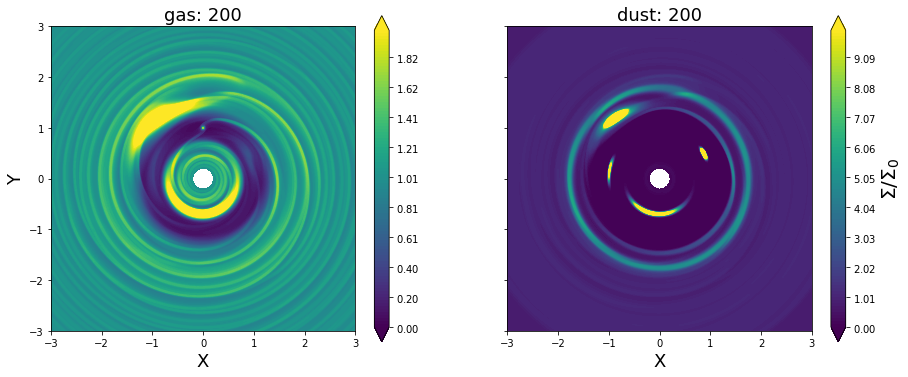

In [12]:
gdplot(path, '200')

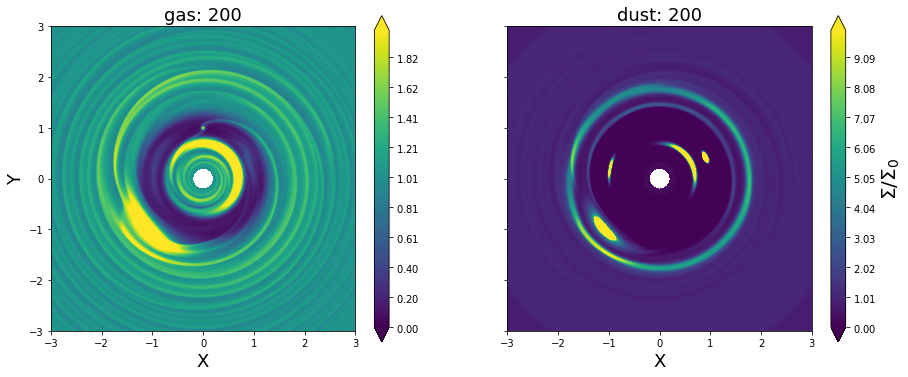

In [13]:
gdplot(path_b0, '200')

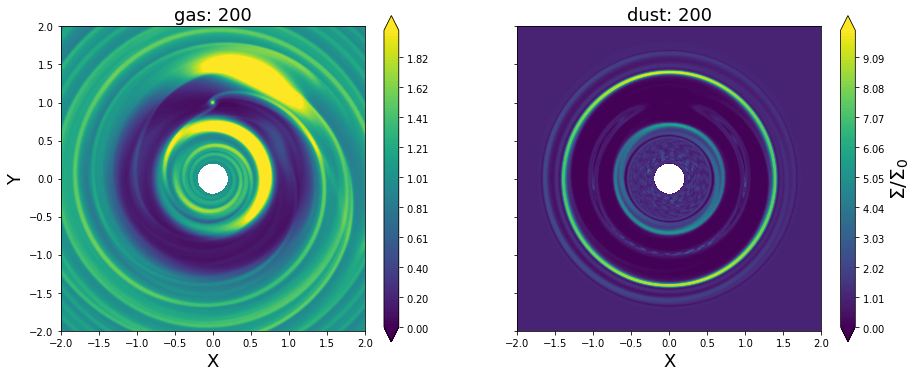

In [34]:
gdplot(path_b0_modified, '200')

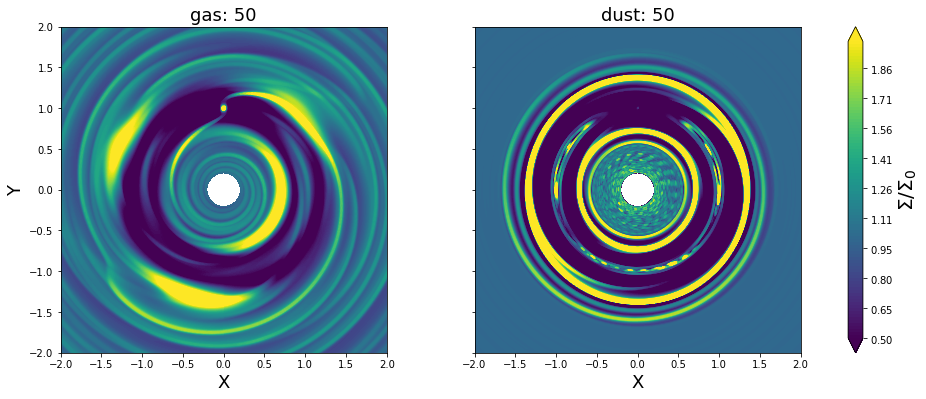

In [8]:
gdplot(path_nu_b0, '50')

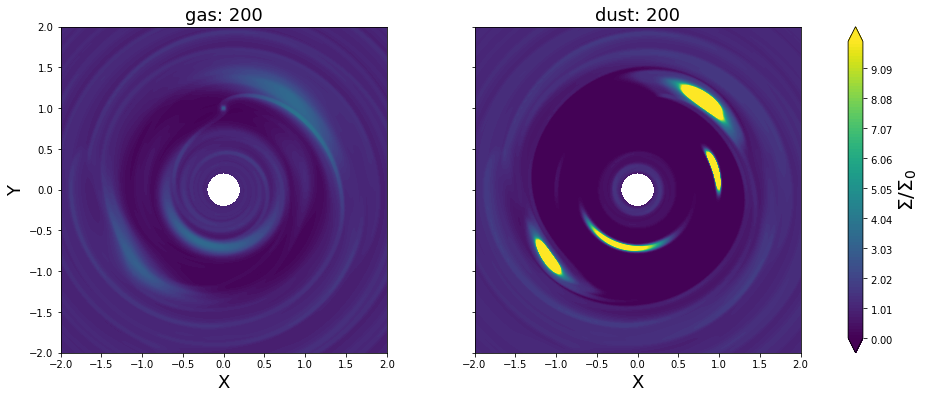

In [16]:
gdplot(path_tap_b0, '200')

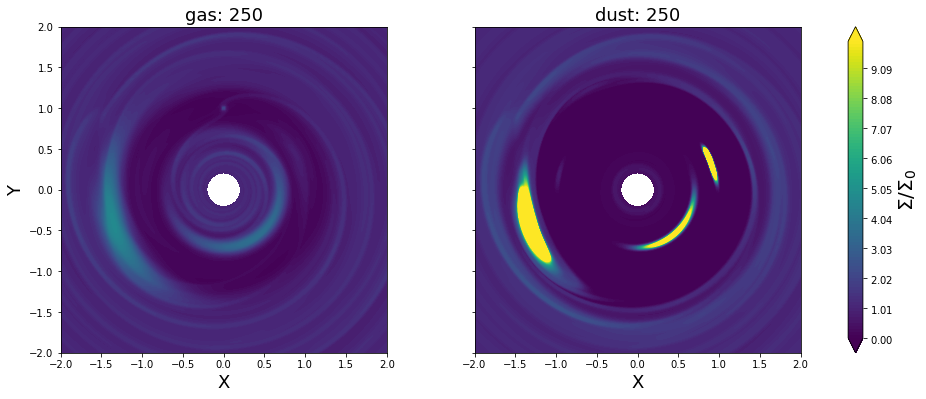

In [17]:
gdplot(path_tap_e5, '250')

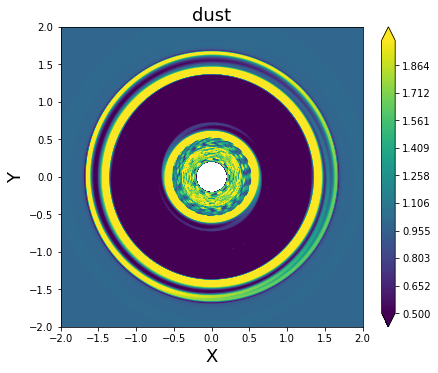

In [68]:
fig, ax = plt.subplots(figsize=(6,5))

toplot = rhod1/rhod_init

r = 2
vmin = 0.5
vmax = 2
levels = np.linspace(vmin,vmax,100)

ax.set_title('dust', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_xlabel('X', fontsize=18)
im = ax.contourf(X, Y, toplot, levels, extend='both')
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)

fig.colorbar(im, ax=ax)
fig.tight_layout(pad=0.05)

In [45]:
def gdplot_sq(fpath, nf):
#     fpath, path, name, nf = param
    
    rhog_i = pl.fromfile(f'{fpath}gasdens0.dat').reshape(ny,nx) 
    rhod_i = pl.fromfile(f'{fpath}dust1dens0.dat').reshape(ny,nx) 
    
    rhog   = pl.fromfile(f'{fpath}gasdens{nf}.dat').reshape(ny,nx) 
    rhod1   = pl.fromfile(f'{fpath}dust1dens{nf}.dat').reshape(ny,nx) 
    
    arr  = [rhog/rhog_i, rhod1/rhod_i]
    
    rmin = 0.8
    rmax = 1.8
#     vmin = 0.5
#     vmax = 2
#     levels = np.linspace(vmin,vmax,100)

    vmins = [0 , 0]
    vmaxs = [2.2, 10]
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6), sharey=True)
    
    for i, vmin, vmax, ax in zip(arr, vmins, vmaxs, axes.flat):
        
#         levels = np.linspace(vmin,vmax,100)
        
        im = ax.pcolormesh(phi_dat, rad_dat, i, vmin=vmin, vmax=vmax)
#         ax.set_xlim(rmin,rmax)
        ax.set_ylim(rmin,rmax)
#         ax.set_aspect('equal')

        formatter = StrMethodFormatter('${x:0.2f}$')
        cbar = fig.colorbar(im, ax=ax, format=formatter)
        
    axes[0].set_title(f'gas: {nf}', fontsize=20)
    axes[1].set_title(f'dust: {nf}', fontsize=20)
    axes[0].set_ylabel('Rad', fontsize=20)
    axes[0].set_xlabel(r'$\phi$', fontsize=20)
    axes[1].set_xlabel(r'$\phi$', fontsize=20) 
#     axes[0].set_xlim(0,360)
#     axes[0].set_xticks(np.arange(0, 420, step=60))
    cbar.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)
    fig.tight_layout(pad=0.0)

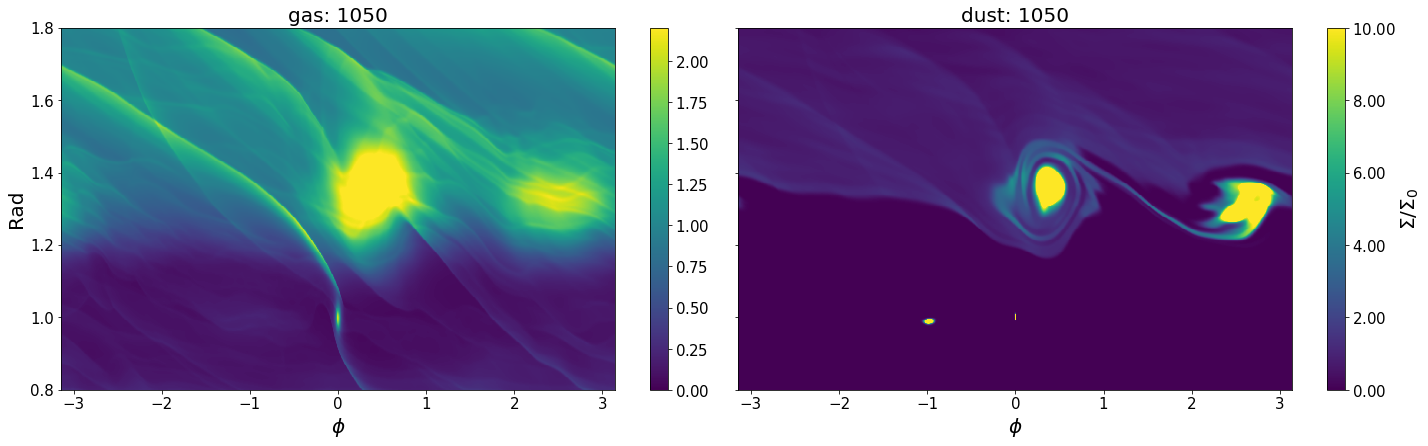

In [46]:
gdplot_sq(path_tapwind_jup_e3, '1050')

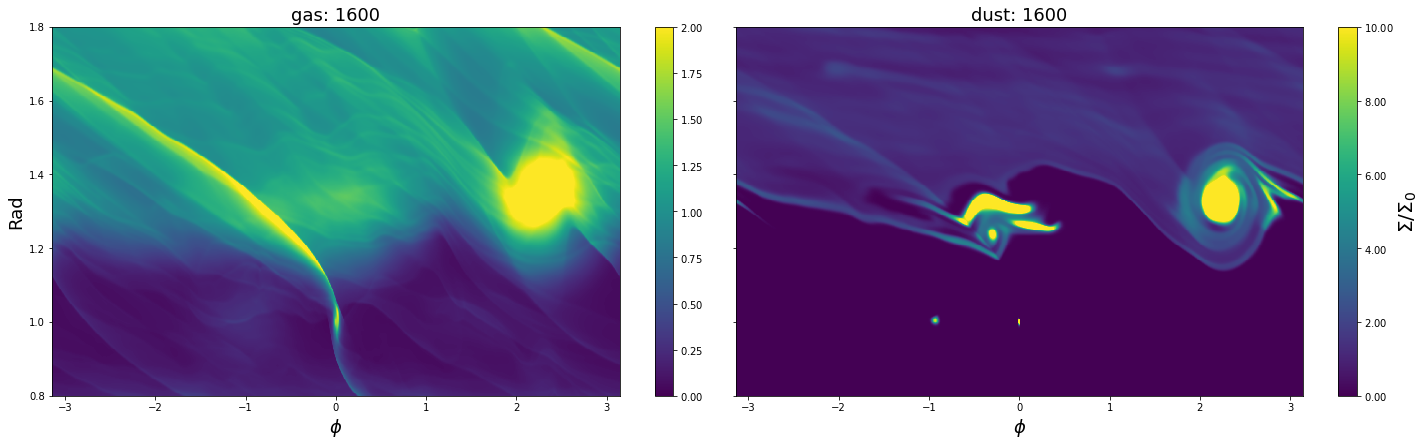

In [106]:
gdplot_sq(path_tapwind_jup_e3, '1600')

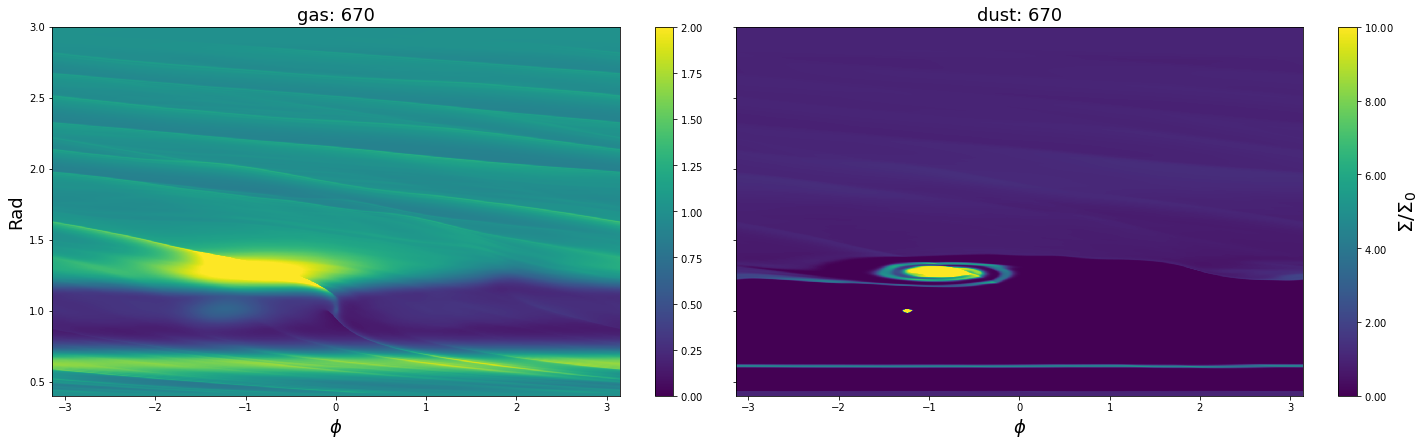

In [126]:
gdplot_sq(path_tapwind_sat_e4, '670')

In [20]:
def gdplot_sq_movie(param):
    fpath, path, name, nf = param
    
    rhog_i = pl.fromfile(f'{fpath}{name}/gasdens0.dat').reshape(ny,nx) 
    rhod_i = pl.fromfile(f'{fpath}{name}/dust1dens0.dat').reshape(ny,nx) 
    
    rhog   = pl.fromfile(f'{fpath}{name}/gasdens{nf}.dat').reshape(ny,nx) 
    rhod1   = pl.fromfile(f'{fpath}{name}/dust1dens{nf}.dat').reshape(ny,nx) 
    
    arr  = [rhog/rhog_i, rhod1/rhod_i]
    
    rmin = 0.8
    rmax = 1.8
#     vmin = 0.5
#     vmax = 2
#     levels = np.linspace(vmin,vmax,100)

    vmins = [0 , 0]
    vmaxs = [2, 10]
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6), sharey=True)
    
    for i, vmin, vmax, ax in zip(arr, vmins, vmaxs, axes.flat):
        
#         levels = np.linspace(vmin,vmax,100)
        
        im = ax.pcolormesh(phi_dat, rad_dat, i, vmin=vmin, vmax=vmax)
#         ax.set_xlim(-r,r)
#         ax.set_ylim(rmin,rmax)
#         ax.set_aspect('equal')

        formatter = StrMethodFormatter('${x:0.2f}$')
        cbar = fig.colorbar(im, ax=ax, format=formatter)
        
    axes[0].set_title(f'gas: {nf}', fontsize=20)
    axes[1].set_title(f'dust: {nf}', fontsize=20)
    axes[0].set_ylabel('Rad', fontsize=20)
    axes[0].set_xlabel(r'$\phi$', fontsize=20)
    axes[1].set_xlabel(r'$\phi$', fontsize=20)  
    cbar.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)
    fig.tight_layout(pad=0.0)
    
    plt.savefig(f'{path}{name}/gdsq_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch
    plt.close()

In [23]:
name = ['tapwind_jup_e4', 'tapwind_jup_e5', 'tapwind_jup_e6', 'tapwind_sat_e3', 'tapwind_sat_e4', 'tapwind_sat_e5', 'tapwind_sat_e6']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 2671, 10)
    params = [(pathu, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        gdplot_sq_movie(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(gdplot_sq_movie, params)
            p.terminate()
        else:
            for param in params:
                gdplot_sq_movie(param)
                
    base_path = f'{paths}{i}'
    base_name = 'gdsq_'
    
    old_range = frame_range
    new_range = range(0, len(old_range))
    
    for (old_number, new_number) in zip(old_range, new_range):
            old_file = "%s/%s%d.png" % (base_path, base_name, old_number)
            tmp_file = "%s/tmp_%s%d.png" % (base_path, base_name, new_number)
            shutil.copyfile(old_file, tmp_file)

In [26]:
name = ['halfsat_e3', 'halfsat_e4', 'halfsat_e5']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 2671, 10)
    params = [(pathu, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        gdplot_sq_movie(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(gdplot_sq_movie, params)
            p.terminate()
        else:
            for param in params:
                gdplot_sq_movie(param)
                
    base_path = f'{paths}{i}'
    base_name = 'gdsq_'
    
    old_range = frame_range
    new_range = range(0, len(old_range))
    
    for (old_number, new_number) in zip(old_range, new_range):
            old_file = "%s/%s%d.png" % (base_path, base_name, old_number)
            tmp_file = "%s/tmp_%s%d.png" % (base_path, base_name, new_number)
            shutil.copyfile(old_file, tmp_file)

In [63]:
# input for parallel jobs for MassTaper with wind e3
num_cores = 12
frame_range = range(0, 3001, 10)
params = [(pathu, paths, 'tapwind_jup_e3/', nf) for nf in frame_range]

# Iterate through frames
if len(frame_range) == 1:
    gdplot_sq_movie(params[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(gdplot_sq_movie, params)
        p.terminate()
    else:
        for param in params:
            gdplot_sq_movie(param)

In [66]:
base_path = '/tiara/ara/data/vle/save_output/tapwind_jup_e3'
base_name = 'gdsq_'

old_range = frame_range
new_range = range(0, len(old_range))

for (old_number, new_number) in zip(old_range, new_range):
        old_file = "%s/%s%d.png" % (base_path, base_name, old_number)
        tmp_file = "%s/tmp_%s%d.png" % (base_path, base_name, new_number)
        shutil.copyfile(old_file, tmp_file)

Text(0.5, 0, 'phi')

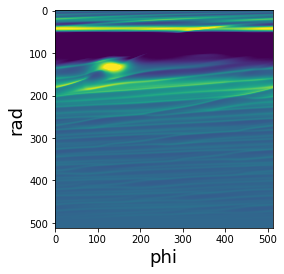

In [22]:
plt.imshow(rhog/rhog_init, vmin=0.5, vmax=2)
plt.ylabel('rad', fontsize=18)
plt.xlabel('phi', fontsize=18)

(0.2, 3.0)

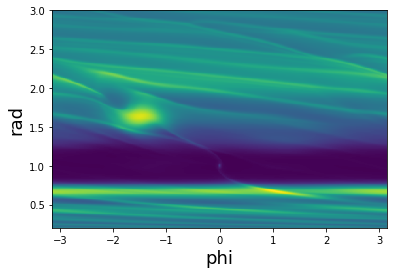

In [26]:
plt.pcolormesh(phi_dat, rad_dat, rhog/rhog_init)
plt.ylabel('rad', fontsize=18)
plt.xlabel('phi', fontsize=18)
plt.ylim(0.2,3)

In [85]:
def make_plot1(param): 
    fpath, path, nf = param
                    
    phi_dat = np.loadtxt(f'{fpath}domain_x.dat')
    rad_dat  = np.loadtxt(f'{fpath}domain_y.dat')[3:-3]
    
    phi = 2.*np.pi*np.linspace(0,1,len(phi_dat)-1) - np.pi/2.
    rad   = 0.5*(rad_dat[:-1] + rad_dat[1:])
    
    nx = len(phi)
    ny = len(rad)
    
    P, R = np.meshgrid(phi, rad)
    X = R*np.cos(P)
    Y = R*np.sin(P)
    
    rhog_i = fromfile(fpath+'gasdens0.dat').reshape(ny,nx)    
    rhod_i = fromfile(fpath+'dust1dens0.dat').reshape(ny,nx)
    
    rhog   = fromfile(f'{fpath}gasdens{nf}.dat').reshape(ny,nx) 
    rhod1  = fromfile(f'{fpath}dust1dens{nf}.dat').reshape(ny,nx)
    
    gas = rhog/rhog_i
    dust1 = rhod1/rhod_init

    fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(16,5), sharey=True)
    
    ax.pcolormesh(phi_dat, rad_dat, rhog/rhog_i)
    ax.set_ylabel('rad', fontsize=18)
    ax.set_xlabel('phi', fontsize=18)
    ax.set_ylim(0.2,3)
    
    ax1.pcolormesh(phi_dat, rad_dat, rhod1/rhod_i)
    # ax1.set_ylabel('rad', fontsize=18)
    ax1.set_xlabel('phi', fontsize=18)
    ax1.set_ylim(0.2,3)
    
    plt.savefig(f'{path}gddens_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch
    plt.close()

In [87]:
# input for parallel jobs
num_cores = 12
frame_range = range(0, 201)
params = [(path, paths, nf) for nf in frame_range]

# Iterate through frames
if len(frame_range) == 1:
    make_plot1(params[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(make_plot1, params)
        p.terminate()
    else:
        for param in params:
            make_plot1(param)

(0.2, 3.0)

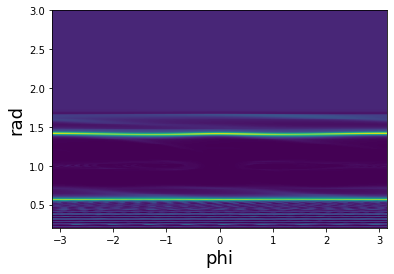

In [71]:
plt.pcolormesh(phi_dat, rad_dat, rhod1/rhod_init)
plt.ylabel('rad', fontsize=18)
plt.xlabel('phi', fontsize=18)
plt.ylim(0.2,3)

In [70]:
def make_plot(param):    
    fpath, path, name, nf = param
    
    phi_dat = np.loadtxt(f'{fpath}domain_x.dat')
    rad_dat  = np.loadtxt(f'{fpath}domain_y.dat')[3:-3]
    
    phi = 2.*np.pi*np.linspace(0,1,len(phi_dat)-1) - np.pi/2.
    rad   = 0.5*(rad_dat[:-1] + rad_dat[1:])
    
    nx = len(phi)
    ny = len(rad)
    
    P, R = np.meshgrid(phi, rad)
    X = R*np.cos(P)
    Y = R*np.sin(P)
    
    rhog_i = fromfile(fpath+'gasdens0.dat').reshape(ny,nx)    
    rhod_i = fromfile(fpath+'dust1dens0.dat').reshape(ny,nx)
    
    rhog   = fromfile(f'{fpath}gasdens{nf}.dat').reshape(ny,nx) 
    rhod1  = fromfile(f'{fpath}dust1dens{nf}.dat').reshape(ny,nx)
    
    gas = rhog/rhog_i
    dust1 = rhod1/rhod_i
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
    
    ax1.plot(rad, np.mean(rhog_i,axis=1), label='initial gas density', ls='-.')
    ax1.plot(rad, np.mean(gas*rhog_i,axis=1), label='average density', c='purple')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
#     ax1.set_ylim(0,1.5)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_i,axis=1), label='initial dust density', ls='-.')
    ax2.plot(rad, np.mean(dust1*rhod_i,axis=1), label='average density', c='purple')
#     ax2.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
#     ax2.set_ylim(0,0.05)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')
    
    plt.savefig(f'{path}{name}avgdens_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch 
    plt.close()

In [47]:
def make_plot(fpath, nf):    
#     fpath, path, name, nf = param
    
    phi_dat = np.loadtxt(f'{fpath}domain_x.dat')
    rad_dat  = np.loadtxt(f'{fpath}domain_y.dat')[3:-3]
    
    phi = 2.*np.pi*np.linspace(0,1,len(phi_dat)-1) - np.pi/2.
    rad   = 0.5*(rad_dat[:-1] + rad_dat[1:])
    
    nx = len(phi)
    ny = len(rad)
    
    P, R = np.meshgrid(phi, rad)
    X = R*np.cos(P)
    Y = R*np.sin(P)
    
    rhog_i = fromfile(f'{fpath}gasdens0.dat').reshape(ny,nx)    
    rhod_i = fromfile(f'{fpath}dust1dens0.dat').reshape(ny,nx)
    
    rhog   = fromfile(f'{fpath}gasdens{nf}.dat').reshape(ny,nx) 
    rhod1  = fromfile(f'{fpath}dust1dens{nf}.dat').reshape(ny,nx)
    
    gas = rhog/rhog_i
    dust1 = rhod1/rhod_i
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,3))   #originally 20,6
    
    ax1.plot(rad, np.mean(rhog_i,axis=1), label='initial gas density', ls='-.')
    ax1.plot(rad, np.mean(gas*rhog_i,axis=1), label='average density', c='purple')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
#     ax1.set_ylim(0.8e-1, 0.6e1)
    ax1.set_xlim(0.8,1.8)
#     ax1.set_ylim(1,2)
#     ax1.set_xscale('log')
#     ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_i,axis=1), label='initial dust density', ls='-.')
    ax2.plot(rad, np.mean(dust1*rhod_i,axis=1), label='average density', c='purple')
#     ax2.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(1e-8, 1.5e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

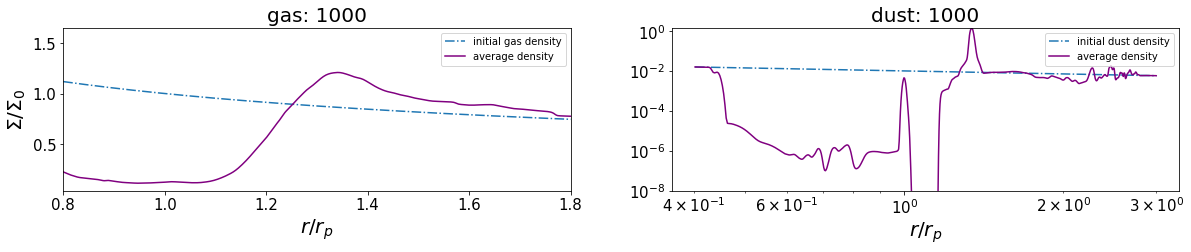

In [48]:
make_plot(path_tapwind_jup_e3, '1000')

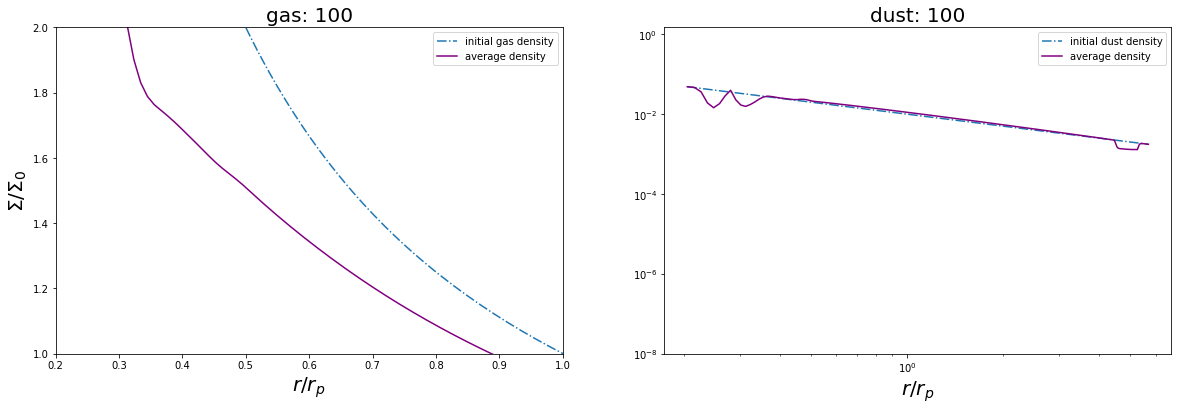

In [38]:
make_plot(path_wind_e3, '100')

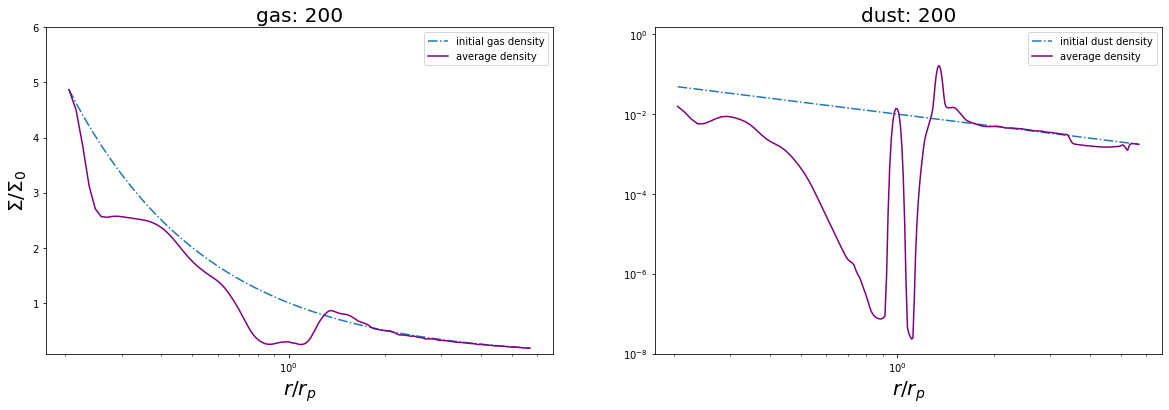

In [12]:
make_plot(path_tap_wind_test_r3, '200')

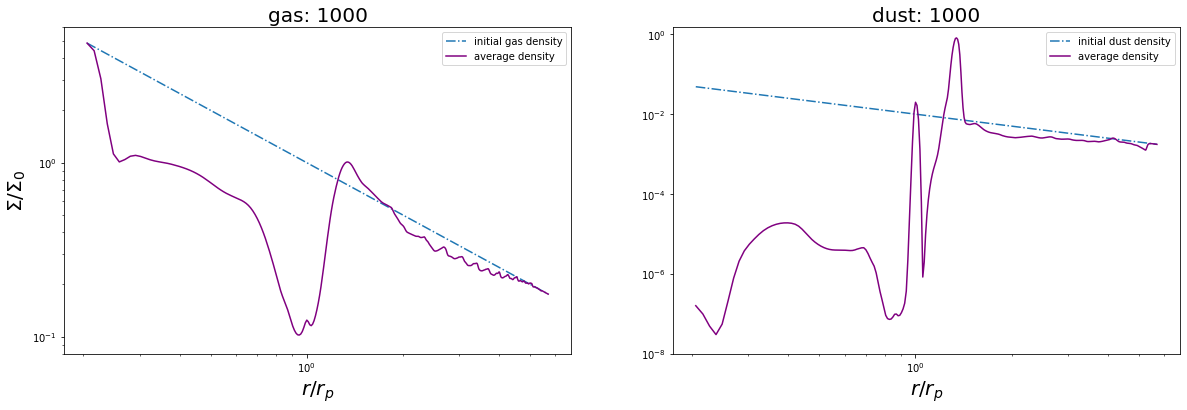

In [27]:
make_plot(path_tap_wind_e3, '1000')

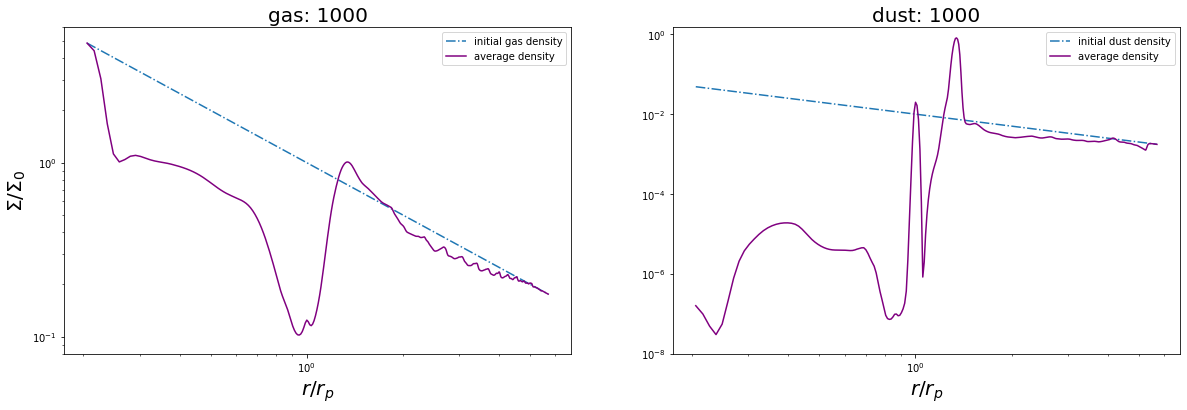

In [44]:
make_plot(path_tap_e3, '1000')

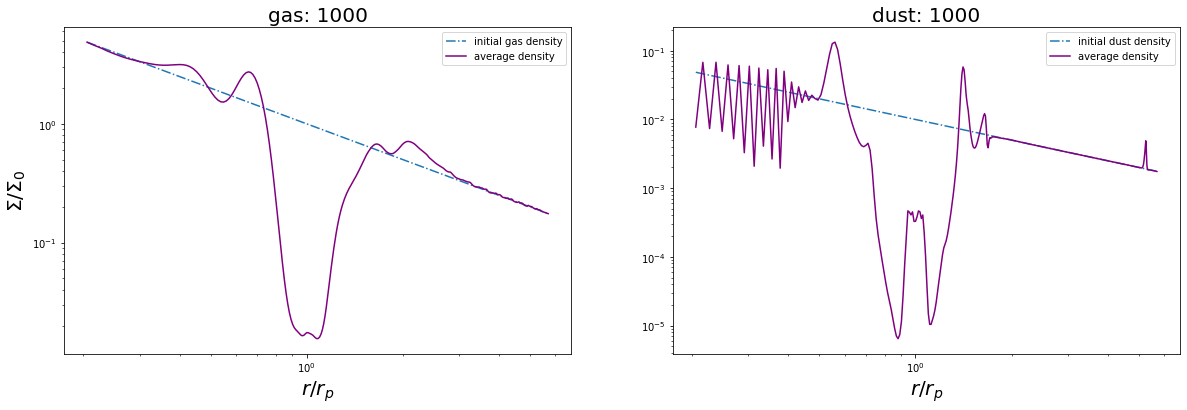

In [69]:
make_plot(path, paths, '1000')

def movie_plot(fpath, path):
    
    for nf in range(0, 1001):        
        make_plot(fpath, path, nf)

In [72]:
# input for parallel jobs for MassTaper with e3
num_cores = 12
frame_range = range(0, 1001)
params = [(path_tap_e3, paths, 'tap_e3/', nf) for nf in frame_range]

# Iterate through frames
if len(frame_range) == 1:
    make_plot(params[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(make_plot, params)
        p.terminate()
    else:
        for param in params:
            make_plot(param)

In [39]:
def make_plot_test(nf):  
    
    rhos = [path_tap_b0, path_tap_e3, path_tap_e4, path_tap_e5, path_tap_e6, path_tap_e7]
    gas_arr  = []
    dust_arr = []
    
    for i in rhos:
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
    
#     for n in nf:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_i,axis=1), label='initial gas density', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_i,axis=1), label='b = 0')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_i,axis=1), label=r'b = $10^{-3}$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_i,axis=1), label=r'$10^{-4}$')
    ax1.plot(rad, np.mean(gas_arr[3]*rhog_i,axis=1), label=r'$10^{-5}$')
    ax1.plot(rad, np.mean(gas_arr[4]*rhog_i,axis=1), label=r'$10^{-6}$')
    ax1.plot(rad, np.mean(gas_arr[5]*rhog_i,axis=1), label=r'$10^{-7}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.5e-2, 0.6e1)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_i,axis=1), label='initial dust density', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_i,axis=1), label='b = 0')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_i,axis=1), label=r'b = $10^{-3}$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_i,axis=1), label=r'$10^{-4}$')
    ax2.plot(rad, np.mean(dust_arr[3]*rhod_i,axis=1), label=r'$10^{-5}$')
    ax2.plot(rad, np.mean(dust_arr[4]*rhod_i,axis=1), label=r'$10^{-6}$')
    ax2.plot(rad, np.mean(dust_arr[5]*rhod_i,axis=1), label=r'$10^{-7}$')
#     ax2.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-13, 1.5e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')
    
    plt.savefig(f'{paths_comb}avgdens_comb_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch 
    plt.close()

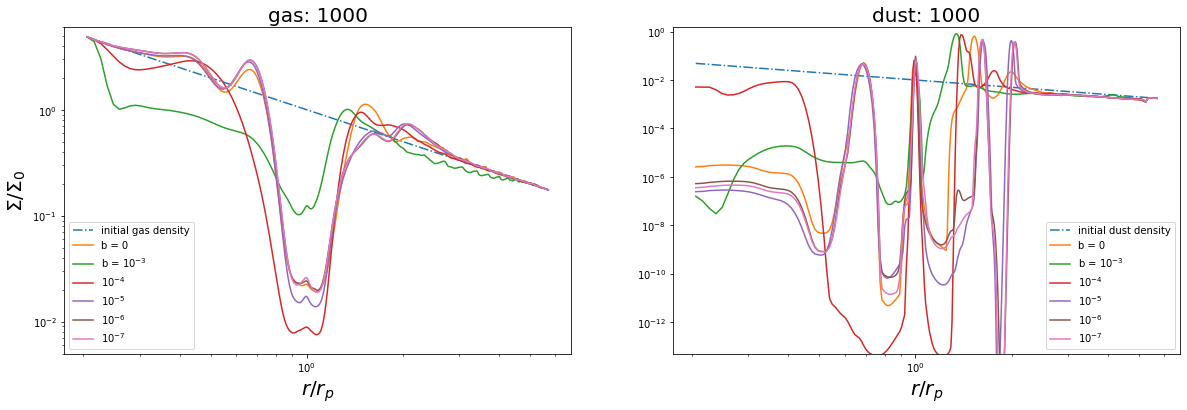

In [38]:
make_plot_test('1000')

In [42]:
# input for parallel jobs for MassTaper with all b values
num_cores = 12
frame_range = range(0, 1001)

# Iterate through frames
if len(frame_range) == 1:
    make_plot_test(frame_range[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(make_plot_test, frame_range)
        p.terminate()
    else:
        for nf in frame_range:
            make_plot_test(nf)

In [13]:
def make_plot_wind(nf):  
    
    rhos = [path_wind_e3, path_no_wind_e3]
    gas_arr  = []
    dust_arr = []
    
    for i in rhos:
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
    
#     for n in nf:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_i,axis=1), label='initial gas density', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_i,axis=1), label='wind')
#     ax1.plot(rad, np.mean(gas_arr[1]*rhog_i,axis=1), label='no wind')
#     ax1.plot(rad, np.mean(gas_arr[2]*rhog_i,axis=1), label=r'$10^{-4}$')
#     ax1.plot(rad, np.mean(gas_arr[3]*rhog_i,axis=1), label=r'$10^{-5}$')
#     ax1.plot(rad, np.mean(gas_arr[4]*rhog_i,axis=1), label=r'$10^{-6}$')
#     ax1.plot(rad, np.mean(gas_arr[5]*rhog_i,axis=1), label=r'$10^{-7}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.5e-2, 0.6e1)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_i,axis=1), label='initial dust density', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_i,axis=1), label='wind')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_i,axis=1), label='no wind')
#     ax2.plot(rad, np.mean(dust_arr[2]*rhod_i,axis=1), label=r'$10^{-4}$')
#     ax2.plot(rad, np.mean(dust_arr[3]*rhod_i,axis=1), label=r'$10^{-5}$')
#     ax2.plot(rad, np.mean(dust_arr[4]*rhod_i,axis=1), label=r'$10^{-6}$')
#     ax2.plot(rad, np.mean(dust_arr[5]*rhod_i,axis=1), label=r'$10^{-7}$')
#     ax2.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-13, 1.5e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

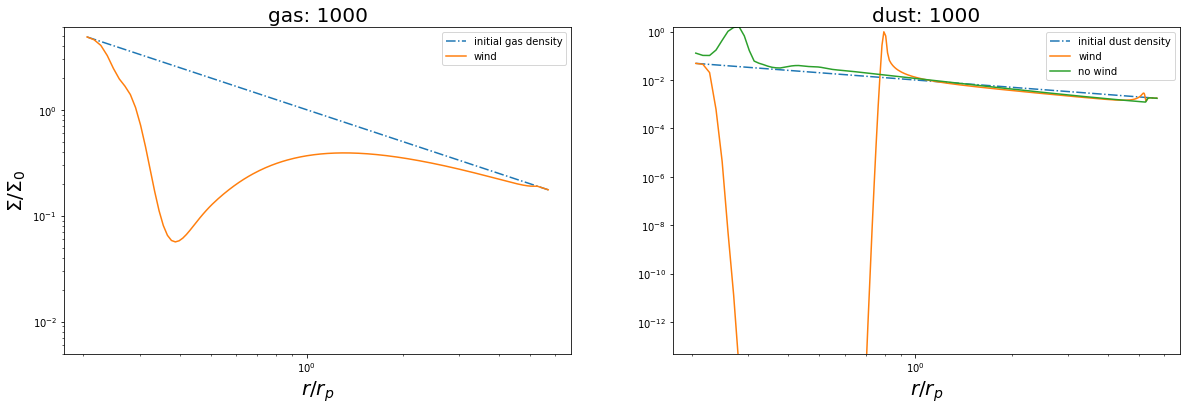

In [14]:
make_plot_wind('1000')

In [32]:
def make_plot_slope(nf): 
    
#     name, nf = param
    
    rhos = [path_torque_slope_05, path_torque_slope_15]
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
#     print(f'gas_arr: {gas_arr.shape}')
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        print(f'{gas.shape}')
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
#     for n in nf:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label='initial gas density 0.5', ls='-.')
    print(f'mean: {np.mean(rhog_arr[0],axis=1).shape}')
    ax1.plot(rad, np.mean(rhog_arr[1],axis=1), label='initial gas density 1.5', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label='slope = 0.5')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label='slope = 1.5')
#     ax1.plot(rad, np.mean(gas_arr[2]*rhog_i,axis=1), label='slope = 1.5')
#     ax1.plot(rad, np.mean(gas_arr[3]*rhog_i,axis=1), label=r'$10^{-5}$')
#     ax1.plot(rad, np.mean(gas_arr[4]*rhog_i,axis=1), label=r'$10^{-6}$')
#     ax1.plot(rad, np.mean(gas_arr[5]*rhog_i,axis=1), label=r'$10^{-7}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
#     ax1.set_ylim(0.5e-2, 0.6e1)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label='initial dust density 0.5', ls='-.')
    ax2.plot(rad, np.mean(rhod_arr[1],axis=1), label='initial dust density 1.5', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label='slope = 0.5')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label='slope = 1.0')
#     ax2.plot(rad, np.mean(dust_arr[2]*rhod_i,axis=1), label='slope = 1.5')
#     ax2.plot(rad, np.mean(dust_arr[3]*rhod_i,axis=1), label=r'$10^{-5}$')
#     ax2.plot(rad, np.mean(dust_arr[4]*rhod_i,axis=1), label=r'$10^{-6}$')
#     ax2.plot(rad, np.mean(dust_arr[5]*rhod_i,axis=1), label=r'$10^{-7}$')
#     ax2.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
#     ax2.set_ylim(0.5e-13, 1.5e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

#     plt.savefig(f'{paths}{name}test_torque_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch 
#     plt.close()

(512, 512)
(512, 512)
mean: (512,)


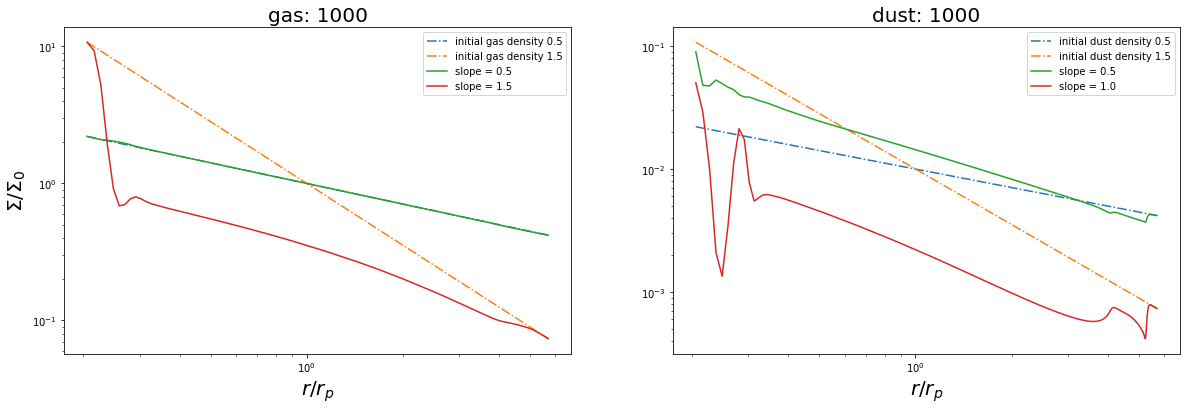

In [33]:
make_plot_slope('1000')

In [29]:
def tap_wind(nf): 
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label='initial gas density', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[1],axis=1), label=r'gas dens_i $10^{-4}$', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[2],axis=1), label=r'gas dens_i $10^{-5}$', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[3],axis=1), label=r'gas dens_i $10^{-6}$', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=r'$10^{-3}$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=r'$10^{-4}$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=r'$10^{-5}$')
    ax1.plot(rad, np.mean(gas_arr[3]*rhog_arr[3],axis=1), label=r'$10^{-6}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.6e-2, 0.6e1)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label='initial dust density', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[1],axis=1), label=r'dust dens_i $10^{-4}$', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[2],axis=1), label=r'dust dens_i $10^{-5}$', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[3],axis=1), label=r'dust dens_i $10^{-6}$', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=r'$10^{-3}$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=r'$10^{-4}$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=r'$10^{-5}$')
    ax2.plot(rad, np.mean(dust_arr[3]*rhod_arr[3],axis=1), label=r'$10^{-6}$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-13, 1.5e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

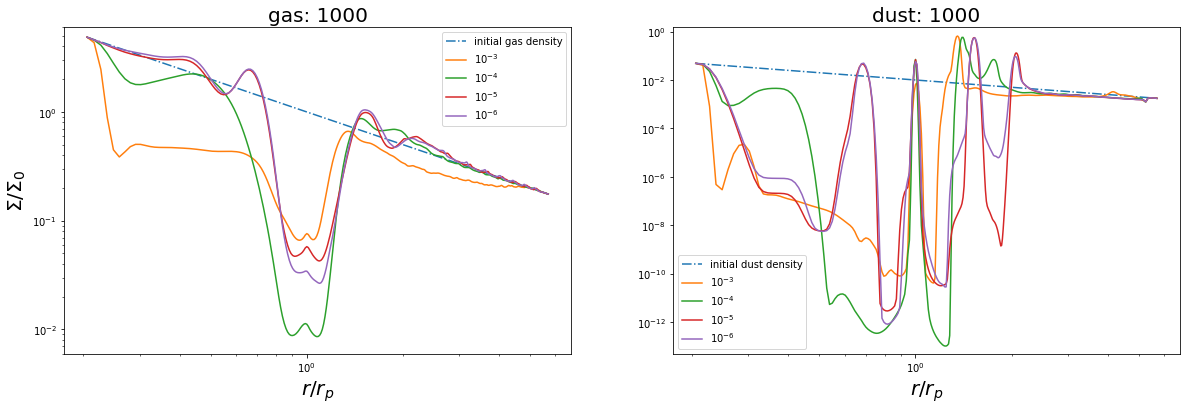

In [30]:
rho = [path_tap_wind_e3, path_tap_wind_e4, path_tap_wind_e5, path_tap_wind_e6]

tap_wind('1000')

In [8]:
def tap_wind_movie(nf): 
    
#     paths, rho, nf = param
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label='initial gas density', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[1],axis=1), label=r'gas dens_i $10^{-4}$', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[2],axis=1), label=r'gas dens_i $10^{-5}$', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[3],axis=1), label=r'gas dens_i $10^{-6}$', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=r'$10^{-3}$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=r'$10^{-4}$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=r'$10^{-5}$')
    ax1.plot(rad, np.mean(gas_arr[3]*rhog_arr[3],axis=1), label=r'$10^{-6}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.6e-2, 0.6e1)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label='initial dust density', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[1],axis=1), label=r'dust dens_i $10^{-4}$', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[2],axis=1), label=r'dust dens_i $10^{-5}$', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[3],axis=1), label=r'dust dens_i $10^{-6}$', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=r'$10^{-3}$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=r'$10^{-4}$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=r'$10^{-5}$')
    ax2.plot(rad, np.mean(dust_arr[3]*rhod_arr[3],axis=1), label=r'$10^{-6}$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-13, 1.5e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

    plt.savefig(f'{paths_comb}avg_wind_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch 
    plt.close()

In [23]:
########### It took 3 minutes to run this cell ###########

rho = [path_tap_wind_e3, path_tap_wind_e4, path_tap_wind_e5, path_tap_wind_e6]

# input for parallel jobs for MassTaper torque and wind
num_cores = 12
frame_range = range(0, 1001)

# Iterate through frames
if len(frame_range) == 1:
    tap_wind_movie(frame_range[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(tap_wind_movie, frame_range)
        p.terminate()
    else:
        for nf in frame_range:
            tap_wind_movie(nf)

In [9]:
########### It took 4 minutes to run this cell ###########

rho = [path_wind_e3, path_wind_e4, path_wind_e5, path_wind_e6]

# input for parallel jobs for MassTaper torque and wind
num_cores = 12
frame_range = range(0, 1001)

# Iterate through frames
if len(frame_range) == 1:
    tap_wind_movie(frame_range[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(tap_wind_movie, frame_range)
        p.terminate()
    else:
        for nf in frame_range:
            tap_wind_movie(nf)

In [36]:
def tapwind_movie(nf): 
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label='initial density 0.5', ls='-.')
    ax1.plot(rad, np.mean(rhog_arr[1],axis=1), label='initial density 1.0', ls='-.')
    ax1.plot(rad, np.mean(rhog_arr[2],axis=1), label='initial density 1.5', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=r'$slope = 0.5$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=r'$slope = 1.0$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=r'$slope = 1.5$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.5e-1, 0.3e2)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label='initial density 0.5', ls='-.')
    ax2.plot(rad, np.mean(rhod_arr[1],axis=1), label='initial density 1.0', ls='-.')
    ax2.plot(rad, np.mean(rhod_arr[2],axis=1), label='initial density 1.5', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=r'$slope = 0.5$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=r'$slope = 1.0$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=r'$slope = 1.5$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.3e-3, 0.3e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

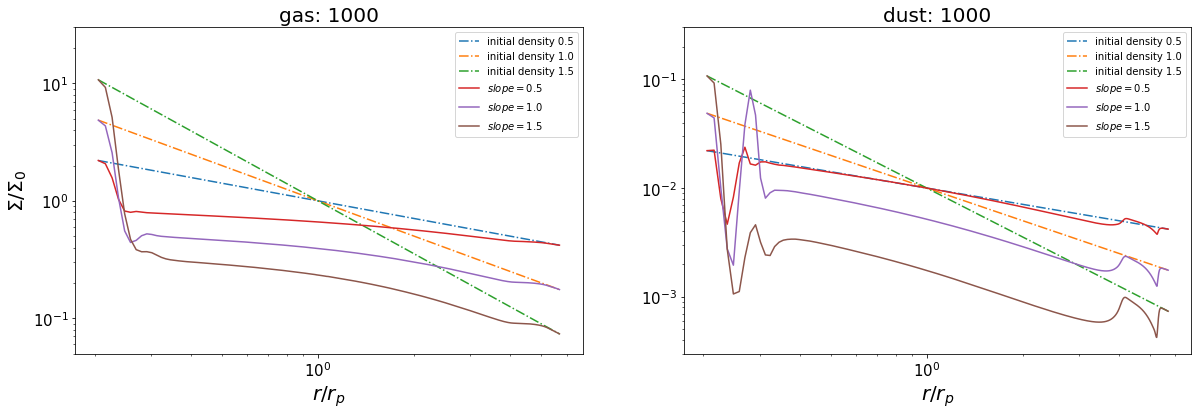

In [37]:
rho = [path_tapwind_np_05, path_tapwind_np_1, path_tapwind_np_15]
tapwind_movie('1000')

In [38]:
def tapwind_movie(nf): 
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label='initial density 0.5', ls='-.')
    ax1.plot(rad, np.mean(rhog_arr[1],axis=1), label='initial density 1.0', ls='-.')
    ax1.plot(rad, np.mean(rhog_arr[2],axis=1), label='initial density 1.5', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=r'$slope = 0.5$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=r'$slope = 1.0$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=r'$slope = 1.5$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.5e-1, 0.3e2)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label='initial density 0.5', ls='-.')
    ax2.plot(rad, np.mean(rhod_arr[1],axis=1), label='initial density 1.0', ls='-.')
    ax2.plot(rad, np.mean(rhod_arr[2],axis=1), label='initial density 1.5', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=r'$slope = 0.5$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=r'$slope = 1.0$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=r'$slope = 1.5$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.3e-3, 0.3e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

    plt.savefig(f'{paths_comb}avg_tapwind_np_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch 
    plt.close()

In [39]:
rho = [path_tapwind_np_05, path_tapwind_np_1, path_tapwind_np_15]

# input for parallel jobs for MassTaper torque and wind
num_cores = 12
frame_range = range(0, 1001)

# Iterate through frames
if len(frame_range) == 1:
    tapwind_movie(frame_range[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(tapwind_movie, frame_range)
        p.terminate()
    else:
        for nf in frame_range:
            tapwind_movie(nf)

In [6]:
def jup_sat_34(nf): 
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label=r'dens_i', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[1],axis=1), label=r'Jup dens_i $10^{-4}$', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[2],axis=1), label=r'Sat dens_i $10^{-3}$', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[3],axis=1), label=r'Sat dens_i $10^{-4}$', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=r'Jup $10^{-3}$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=r'Jup $10^{-4}$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=r'Sat $10^{-3}$')
    ax1.plot(rad, np.mean(gas_arr[3]*rhog_arr[3],axis=1), label=r'Sat $10^{-4}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.6e-2, 0.6e1)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label=r'dens_i', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[1],axis=1), label=r'Jup dens_i $10^{-4}$', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[2],axis=1), label=r'Sat dens_i $10^{-3}$', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[3],axis=1), label=r'Sat dens_i $10^{-4}$', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=r'Jup $10^{-3}$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=r'Jup $10^{-4}$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=r'Sat $10^{-3}$')
    ax2.plot(rad, np.mean(dust_arr[3]*rhod_arr[3],axis=1), label=r'Sat $10^{-4}$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-13, 1.5e0)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

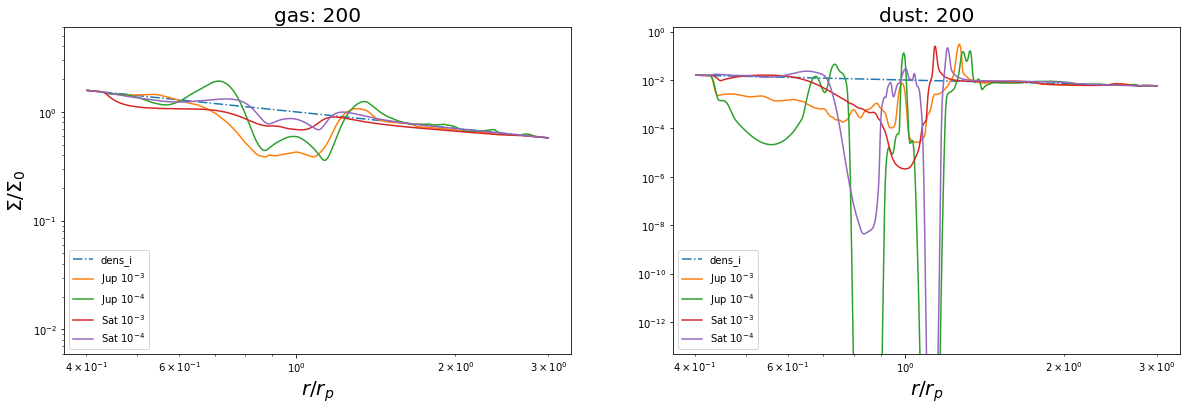

In [9]:
rho = [path_tapwind_jup_e3, path_tapwind_jup_e4, path_tapwind_sat_e3, path_tapwind_sat_e4]

jup_sat_34('200')

In [11]:
def jup_sat(nf): 
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label=r'dens_i', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[1],axis=1), label=r'Jup dens_i $10^{-4}$', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[2],axis=1), label=r'Sat dens_i $10^{-3}$', ls='-.')
#     ax1.plot(rad, np.mean(rhog_arr[3],axis=1), label=r'Sat dens_i $10^{-4}$', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=r'Jup $10^{-5}$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=r'Jup $10^{-6}$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=r'Sat $10^{-5}$')
    ax1.plot(rad, np.mean(gas_arr[3]*rhog_arr[3],axis=1), label=r'Sat $10^{-6}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.4e-3, 0.6e1)
#     plt.ylim(1.5e-3, 1.5e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label=r'dens_i', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[1],axis=1), label=r'Jup dens_i $10^{-4}$', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[2],axis=1), label=r'Sat dens_i $10^{-3}$', ls='-.')
#     ax2.plot(rad, np.mean(rhod_arr[3],axis=1), label=r'Sat dens_i $10^{-4}$', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=r'Jup $10^{-5}$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=r'Jup $10^{-6}$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=r'Sat $10^{-5}$')
    ax2.plot(rad, np.mean(dust_arr[3]*rhod_arr[3],axis=1), label=r'Sat $10^{-6}$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-15, 1e1)
#     plt.ylim(1.5e-3, 1.5e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

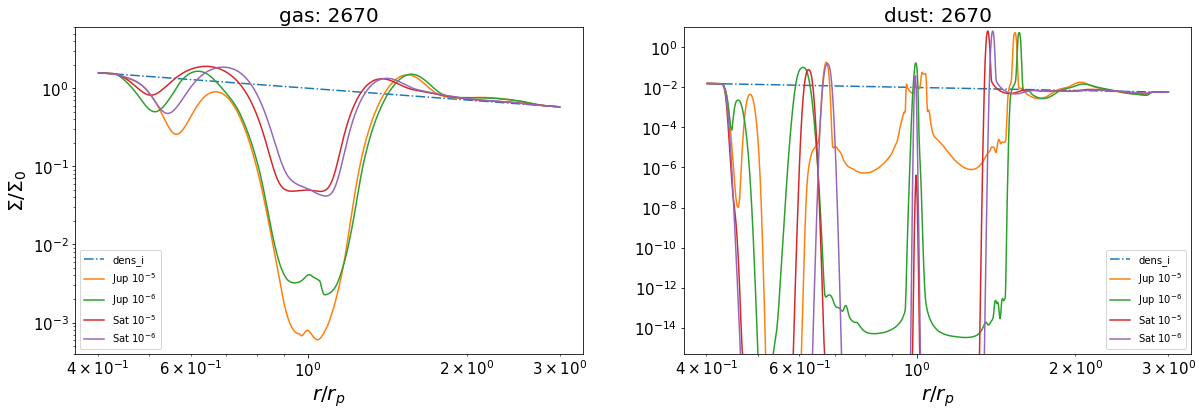

In [12]:
rho = [path_tapwind_jup_e5, path_tapwind_jup_e6, path_tapwind_sat_e5, path_tapwind_sat_e6]

jup_sat('2670')

In [5]:
def sat(name, nf): 
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label=r'dens_i', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=fr'{name} $10^{-3}$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=fr'{name} $10^{-4}$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=fr'{name} $10^{-5}$')
    ax1.plot(rad, np.mean(gas_arr[3]*rhog_arr[3],axis=1), label=fr'{name} $10^{-6}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.3e-1, 0.6e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label=r'dens_i', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=fr'{name} $10^{-3}$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=fr'{name} $10^{-4}$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=fr'{name} $10^{-5}$')
    ax2.plot(rad, np.mean(dust_arr[3]*rhod_arr[3],axis=1), label=fr'{name} $10^{-6}$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-14, 1e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')

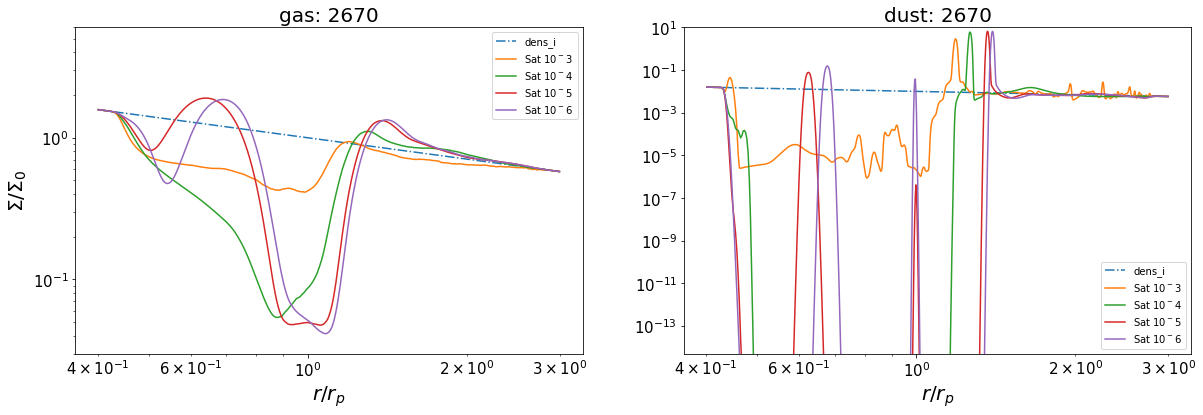

In [6]:
rho = [path_tapwind_sat_e3, path_tapwind_sat_e4, path_tapwind_sat_e5, path_tapwind_sat_e6]

sat('Sat','2670')

In [13]:
def sat(param): 
    name, nf = param
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label=r'dens_i', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=fr'{name} $10^{-3}$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=fr'{name} $10^{-4}$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=fr'{name} $10^{-5}$')
    ax1.plot(rad, np.mean(gas_arr[3]*rhog_arr[3],axis=1), label=fr'{name} $10^{-6}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.4e-3, 0.6e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label=r'dens_i', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=fr'{name} $10^{-3}$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=fr'{name} $10^{-4}$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=fr'{name} $10^{-5}$')
    ax2.plot(rad, np.mean(dust_arr[3]*rhod_arr[3],axis=1), label=fr'{name} $10^{-6}$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-15, 1e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')
    
    plt.savefig(f'{pathu_comb}{name}_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch 
    plt.close()

In [14]:
rho = [path_tapwind_sat_e3, path_tapwind_sat_e4, path_tapwind_sat_e5, path_tapwind_sat_e6]
name = 'Sat'

# input for parallel jobs for MassTaper torque and wind
num_cores = 12
frame_range = range(0, 2671)
params = [(name, nf) for nf in frame_range]

# Iterate through frames
if len(frame_range) == 1:
    sat(params[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(sat, params)
        p.terminate()
    else:
        for param in params:
            sat(param)

In [16]:
base_path = pathu_comb
base_name = 'Sat_'

frame_range = range(0, 2671, 10)
old_range = frame_range
new_range = range(0, len(old_range))

for (old_number, new_number) in zip(old_range, new_range):
        old_file = "%s/%s%d.png" % (base_path, base_name, old_number)
        tmp_file = "%s/tmp_%s%d.png" % (base_path, base_name, new_number)
        shutil.copyfile(old_file, tmp_file)

In [15]:
rho = [path_tapwind_jup_e3, path_tapwind_jup_e4, path_tapwind_jup_e5, path_tapwind_jup_e6]
name = 'Jup'

# input for parallel jobs for MassTaper torque and wind
num_cores = 12
frame_range = range(0, 2671)
params = [(name, nf) for nf in frame_range]

# Iterate through frames
if len(frame_range) == 1:
    sat(params[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(sat, params)
        p.terminate()
    else:
        for param in params:
            sat(param)

In [17]:
base_path = pathu_comb
base_name = 'Jup_'

frame_range = range(0, 2671, 10)
old_range = frame_range
new_range = range(0, len(old_range))

for (old_number, new_number) in zip(old_range, new_range):
        old_file = "%s/%s%d.png" % (base_path, base_name, old_number)
        tmp_file = "%s/tmp_%s%d.png" % (base_path, base_name, new_number)
        shutil.copyfile(old_file, tmp_file)

In [30]:
def half_sat(param): 
    name, nf = param
    
    rhos = rho
    gas_arr  = []
    dust_arr = []
    rhog_arr = []
    rhod_arr = []
    
    for i in rhos:
        rhog_i = fromfile(f'{i}gasdens0.dat').reshape(ny,nx)    
        rhod_i = fromfile(f'{i}dust1dens0.dat').reshape(ny,nx)
        
        rhog   = fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        rhod1  = fromfile(f'{i}dust1dens{nf}.dat').reshape(ny,nx)
        
        gas = rhog/rhog_i
        dust1 = rhod1/rhod_i
        
        gas_arr.append(gas)
        dust_arr.append(dust1)
        rhog_arr.append(rhog_i)
        rhod_arr.append(rhod_i)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
        
    ax1.plot(rad, np.mean(rhog_arr[0],axis=1), label=r'dens_i', ls='-.')
    ax1.plot(rad, np.mean(gas_arr[0]*rhog_arr[0],axis=1), label=fr'{name} $10^{-3}$')
    ax1.plot(rad, np.mean(gas_arr[1]*rhog_arr[1],axis=1), label=fr'{name} $10^{-4}$')
    ax1.plot(rad, np.mean(gas_arr[2]*rhog_arr[2],axis=1), label=fr'{name} $10^{-5}$')
#     ax1.plot(rad, np.mean(gas_arr[3]*rhog_arr[3],axis=1), label=fr'{name} $10^{-6}$')
    ax1.set_ylabel(r'$\Sigma/\Sigma_0$', fontsize=20)
    ax1.set_xlabel(r'$r/r_p$', fontsize=20)
    ax1.set_title(f'gas: {nf}', fontsize=20)
    ax1.set_ylim(0.4e-3, 0.6e1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(loc='best')
    
    ax2.plot(rad, np.mean(rhod_arr[0],axis=1), label=r'dens_i', ls='-.')
    ax2.plot(rad, np.mean(dust_arr[0]*rhod_arr[0],axis=1), label=fr'{name} $10^{-3}$')
    ax2.plot(rad, np.mean(dust_arr[1]*rhod_arr[1],axis=1), label=fr'{name} $10^{-4}$')
    ax2.plot(rad, np.mean(dust_arr[2]*rhod_arr[2],axis=1), label=fr'{name} $10^{-5}$')
#     ax2.plot(rad, np.mean(dust_arr[3]*rhod_arr[3],axis=1), label=fr'{name} $10^{-6}$')
    ax2.set_xlabel(r'$r/r_p$', fontsize=20)
    ax2.set_title(f'dust: {nf}', fontsize=20)
    ax2.set_ylim(0.5e-15, 1e1)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend(loc='best')
    
    plt.savefig(f'{pathu_comb}{name}_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch 
    plt.close()

In [31]:
rho = [path_halfsat_e3, path_halfsat_e4, path_halfsat_e5]
name = 'halfsat'

# input for parallel jobs for MassTaper torque and wind
num_cores = 12
frame_range = range(0, 2671, 10)
params = [(name, nf) for nf in frame_range]

# Iterate through frames
if len(frame_range) == 1:
    half_sat(params[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(half_sat, params)
        p.terminate()
    else:
        for param in params:
            half_sat(param)
                
base_path = pathu_comb
base_name = 'halfsat_'

old_range = frame_range
new_range = range(0, len(old_range))

for (old_number, new_number) in zip(old_range, new_range):
        old_file = "%s/%s%d.png" % (base_path, base_name, old_number)
        tmp_file = "%s/tmp_%s%d.png" % (base_path, base_name, new_number)
        shutil.copyfile(old_file, tmp_file)

rad: (512,)
vr: (512,)
M_dot: (512,)


(0.5, 5.1)

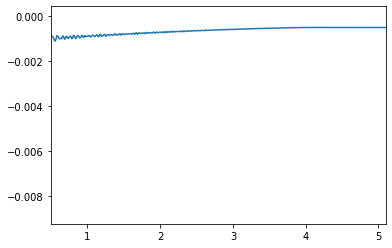

In [57]:
rad2di = np.tile(rad,(ny,1))
rad2di = np.swapaxes(rad2di,0,1)

vr  = fromfile(f'{path_torque_slope_15}gasvy1000.dat').reshape(ny,nx)
rhog   = fromfile(f'{path_torque_slope_15}gasdens1000.dat').reshape(ny,nx)

# M_dot = 2*np.pi*rad*vr[-1,]*rhog[-1,]
M_dot_torq = 2*np.pi*rad*np.mean(vr,axis=1)*np.mean(rhog,axis=1)

print(f'rad: {rad.shape}')
print(f'vr: {vr[-1,].shape}')
print(f'M_dot: {M_dot.shape}')

plt.plot(rad, M_dot_torq)
plt.xlim(0.5, 5.1)

##### take 100

In [43]:
def slope_check_movie(nf): 
    
    M_dot_torq = []
    M_dot_wind = []
    M_dot_tot  = []
    
    for i in slopes:
        
        dr = rad_dat[1] - rad_dat[0]
        dphi = phi_dat[1] - phi_dat[0]
        
        rhog= fromfile(f'{i}gasdens{nf}.dat').reshape(ny,nx) 
        vr  = fromfile(f'{i}gasvy{nf}.dat').reshape(ny,nx)
        
        M_torq = 2*np.pi * rad * np.mean(vr,axis=1) * np.mean(rhog,axis=1)
        M_wind = rad**(-1/2) * 10**(-3) / 2*np.pi * np.mean(rhog,axis=1) * dr * dphi
        M_tot  = M_torq + M_wind
        
        M_dot_torq.append(M_torq)
        M_dot_wind.append(M_wind)
        M_dot_tot.append(M_tot)
        
#     print(f'M_torq: {M_dot_torq}')
#     print(f'M_wind: {M_dot_wind}')
#     print(f'M_tot: {M_dot_tot}')
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5), sharey=True)
        
    ax1.plot(rad, M_dot_torq[0], label='torque', c='b')
    ax1.plot(rad, M_dot_wind[0], label='wind', c='g')
    ax1.plot(rad, M_dot_tot[0], label='tot', c='orange')
    ax1.set_ylabel(r'$M_{dot}$', fontsize=20)
    ax1.set_xlabel(r'$Rad$', fontsize=20)
    ax1.set_title(fr'sigma slope: 0.5 at {nf}', fontsize=20)
    ax1.set_xlim(0.3, 5.1)
    ax1.set_ylim(-0.004, 0.0005)
    ax1.legend(loc='best')
    
    ax2.plot(rad, M_dot_torq[1], label='torque', c='b')
#     ax2.plot(rad, M_dot_wind[1], label='wind', c='g')
    ax2.plot(rad, M_dot_tot[1], label='tot', c='orange')
    ax2.set_xlabel(r'$Rad$', fontsize=20)
    ax2.set_title(fr'sigma slope: 1.0 at {nf}', fontsize=20)
    ax2.set_xlim(0.3, 5.1)
    ax2.set_ylim(-0.004, 0.0005)
    ax2.legend(loc='best')

    ax3.plot(rad, M_dot_torq[2], label='torque', c='b')
    ax3.plot(rad, M_dot_wind[2], label='wind', c='g')
#     ax3.plot(rad, M_dot_tot[2], label='tot', c='orange')
    ax3.set_xlabel(r'$Rad$', fontsize=20)
    ax3.set_title(fr'sigma slope: 1.5 at {nf}', fontsize=20)
    ax3.set_xlim(0.3, 5.1)
    ax3.set_ylim(-0.004, 0.0005)
    ax3.legend(loc='best')
    
    fig.tight_layout(pad=0.8)

    plt.savefig(f'{paths_comb}slopetot_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch 
    plt.close()

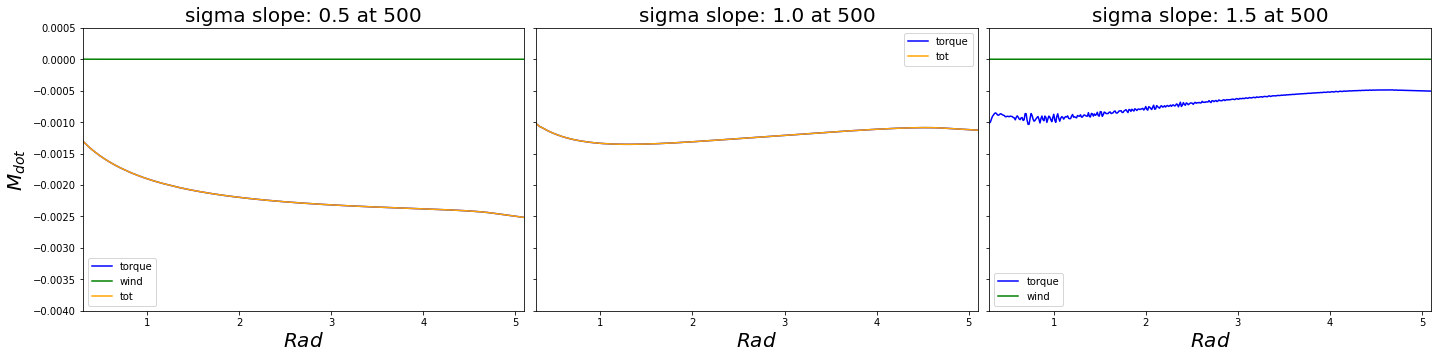

In [44]:
slopes = [path_tapwind_np_05, path_tapwind_np_1, path_tapwind_np_15]
slope_check_movie('500')

In [46]:
slopes = [path_tapwind_np_05, path_tapwind_np_1, path_tapwind_np_15]

# input for parallel jobs for MassTaper torque and wind slope check
num_cores = 12
frame_range = range(0, 1001)

# Iterate through frames
if len(frame_range) == 1:
    slope_check_movie(frame_range[0])
else:
    if num_cores > 1:
        p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
        p.map(slope_check_movie, frame_range)
        p.terminate()
    else:
        for nf in frame_range:
            slope_check_movie(nf)

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

In [ ]:
rad2di = np.tile(rad,(ny,1))
rad2di = np.swapaxes(rad2di,0,1)

vr  = fromfile(f'{path_tapwind_np_15}gasvy500.dat').reshape(ny,nx)
rhog   = fromfile(f'{path_tapwind_np_15}gasdens500.dat').reshape(ny,nx)

# M_dot = 2*np.pi*rad*vr[-1,]*rhog[-1,]
M_dot = 2*np.pi*rad*np.mean(vr,axis=1)*np.mean(rhog,axis=1)

# print(f'rad: {rad.shape}')
# print(f'vr: {vr[-1,].shape}')
# print(f'M_dot: {M_dot.shape}')

plt.plot(rad, M_dot)
plt.xlim(0.5, 5.1)

In [5]:
diff_rad = np.diff(rad_dat)
diff_phi = np.diff(phi_dat)

rad2di = np.tile(rad,(ny,1))
rad2di = np.swapaxes(rad2di,0,1)

rad2d = np.tile(diff_rad,(ny,1))
rad2d = np.swapaxes(rad2d,0,1)
phi2d = np.tile(diff_phi,(nx,1))
phi2d = np.swapaxes(phi2d,0,1)

omega = np.sqrt(1/rad2di**3)

vr  = fromfile(f'{path_tap_e3}gasvy1000.dat').reshape(ny,nx)
vr0 = fromfile(f'{path_tap_e3}gasvy0.dat').reshape(ny,nx)

vphi  = fromfile(f'{path_tap_e3}gasvx1000.dat').reshape(ny,nx)
vphi0 = fromfile(f'{path_tap_e3}gasvx0.dat').reshape(ny,nx)

print(f'diff v: {(vr[1] - vr0[1]).shape}')
print(f'diff phi: {(np.diff(phi)).shape}')
print(f'vphi: {vphi.shape}')
print(f'1st half rad2d[:,0:-1]*np.diff(rad2d): {(rad2d[:,0:-1]*np.diff(rad2d)).shape}')
print(f'rad2d: {rad2d.shape}')
print(f'rad2di: {rad2di.shape}')
print(f'phi2d: {phi2d[:,0:-1].shape}')
# print(f'rad2di[:,:]*rad2d[:,:]: {(rad2di[0:-1,0:-1]*rad2d[:,0:-1]).shape}')
# print(f'1st rad2d[:,0:-1]*vphi[:,0:-1] - rad2d[:,0:-1]*vphi0[:,0:-1]: {(np.diff(rad2d[:,:]*vphi[0:-1,:] - rad2d[:,:]*vphi0[0:-1,:])).shape}')
print(f'rad shape: {rad.shape}, phi shape: {phi.shape}')
print(f'vr shape: {vr.shape}, vr0 shape: {vr0[1].shape}')
print(f'vphi shape: {vphi.shape}, vphi0 shape: {vphi0[0].shape}')
print(f'np.diff(vr - vr0): {np.diff(vr[0:-1,:] - vr0[0:-1,:]).shape}')

append = np.tile(diff_rad*vphi[-1,:]-diff_rad*vphi0[-1,:], (1, 1))
print(f'append: {append.shape}')
prepend = np.transpose(np.tile(vr[:,-1]-vr0[:,-1], (1, 1)))
print(f'prepend: {prepend.shape}')

first_term  = np.diff(rad2di[:,:]*vphi[:,:] - rad2di[:,:]*vphi0[:,:], axis=0, append=append) 
first_term /= (rad2di[:,:]*rad2d[:,:])
second_term = np.diff(vr[:,:] - vr0[:,:], axis=-1, prepend=prepend) / phi2d[:,:]
del_v = (first_term - second_term) / rad2di[:,:]
rossby = del_v / 2*omega

print(f'1st_term shape: {first_term.shape}')
print(f'2nd_term shape: {second_term.shape}')
print(f'1st_term: {first_term}')
print(f'2nd_term: {second_term}')
print(f'del v: {del_v}')
print(f'rossby: {rossby}')

### remember to divide to 2omega

diff v: (512,)
diff phi: (511,)
vphi: (512, 512)
1st half rad2d[:,0:-1]*np.diff(rad2d): (512, 511)
rad2d: (512, 512)
rad2di: (512, 512)
phi2d: (512, 511)
rad shape: (512,), phi shape: (512,)
vr shape: (512, 512), vr0 shape: (512,)
vphi shape: (512, 512), vphi0 shape: (512,)
np.diff(vr - vr0): (511, 511)
append: (1, 512)
prepend: (512, 1)
1st_term shape: (512, 512)
2nd_term shape: (512, 512)
1st_term: [[-6.62496466e-01 -6.61697145e-01 -6.60874818e-01 ... -6.65132385e-01
  -6.64202037e-01 -6.63315516e-01]
 [-3.69718865e+00 -3.69957060e+00 -3.70203828e+00 ... -3.68952600e+00
  -3.69221752e+00 -3.69479942e+00]
 [-4.57268154e-01 -4.51135345e-01 -4.44700975e-01 ... -4.74490378e-01
  -4.68867249e-01 -4.63105499e-01]
 ...
 [ 1.25143367e-03  1.26363356e-03  1.27564260e-03 ...  1.21370942e-03
   1.22646948e-03  1.23904493e-03]
 [ 1.28180842e-03  1.29307600e-03  1.30414768e-03 ...  1.24684507e-03
   1.25869148e-03  1.27034644e-03]
 [ 1.35366592e-02  1.39454207e-02  1.43521085e-02 ...  1.22985521e

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


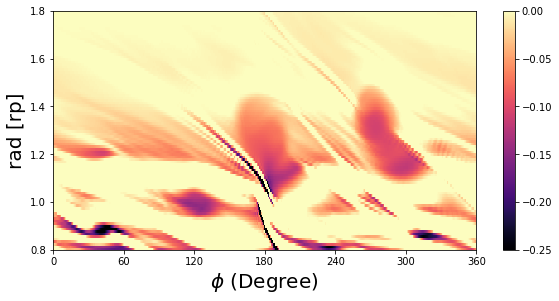

In [30]:
fig, ax = plt.subplots(figsize=(8,4))

rossby_plot = plt.pcolormesh(phi*180/np.pi + 90, rad, rossby, cmap= "magma")

cmin = -0.25
cmax = 0.0
rossby_plot.set_clim([cmin, cmax])

ax.set_ylim(0.8,1.8)
ax.set_xlim(0,360)
ax.set_xlabel(r'$\phi$ (Degree)', fontsize=20)
ax.set_ylabel('rad [rp]', fontsize=20)
ax.set_xticks(np.arange(0, 420, step=60))

fig.colorbar(rossby_plot, ax=ax)
fig.tight_layout(pad=0.05)

Text(0.5, 0, 'phi')

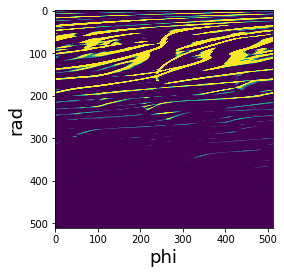

In [112]:
plt.imshow(del_v, vmin=0.5, vmax=2)
plt.ylabel('rad', fontsize=18)
plt.xlabel('phi', fontsize=18)

In [11]:
# def rossby(fpath, name, nf):
def rossby(param):
    
    fpath, path, name, nf = param
    
    kind = ['gas','dust1']
    arr  = []

    for k in kind:
        vr  = fromfile(f'{fpath}{name}/{k}vy{nf}.dat').reshape(ny,nx)
        vr0 = fromfile(f'{fpath}{name}/{k}vy0.dat').reshape(ny,nx)
        
        vphi  = fromfile(f'{fpath}{name}/{k}vx{nf}.dat').reshape(ny,nx)
        vphi0 = fromfile(f'{fpath}{name}/{k}vx0.dat').reshape(ny,nx)
        
        appends = np.tile(diff_rad*vphi[-1,:]-diff_rad*vphi0[-1,:], (1, 1))
        prepend = np.transpose(np.tile(vr[:,-1]-vr0[:,-1], (1, 1)))
        
        first_term  = np.diff(rad2di[:,:]*vphi[:,:] - rad2di[:,:]*vphi0[:,:], axis=0, append=appends) 
        first_term /= (rad2di[:,:]*rad2d[:,:])
        second_term = np.diff(vr[:,:] - vr0[:,:], axis=-1, prepend=prepend) / phi2d[:,:]
        del_v = (first_term - second_term) / rad2di[:,:]
        rossby = del_v / 2*omega
        
        arr.append(rossby)

    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
    
    for i, ax in zip(arr, axes.flat):
        rossby_plot = ax.pcolormesh(phi*180/np.pi + 90, rad, i, cmap= "magma")
    
        cmin = -0.25
        cmax = 0.0
        rossby_plot.set_clim([cmin, cmax])
        
        ax.set_ylim(0.7,1.8)
        ax.set_xlim(0,360)
        ax.set_xticks(np.arange(0, 420, step=60))
#         ax.set_aspect('equal')

        cbar = fig.colorbar(rossby_plot, ax=ax)
        fig.tight_layout(pad=0.05)
        
    axes[0].set_title(f'gas: {nf}', fontsize=20)
    axes[1].set_title(f'dust: {nf}', fontsize=20)
    axes[0].set_ylabel('rad [rp]', fontsize=20)
    axes[0].set_xlabel(r'$\phi$ (Degree)', fontsize=20)
    axes[1].set_xlabel(r'$\phi$ (Degree)', fontsize=20)  
#     cbar = fig.colorbar(rossby_plot, ax=axes[1:])
    cbar.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)

    plt.savefig(f'{path}{name}/rossby_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch
    plt.close()

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


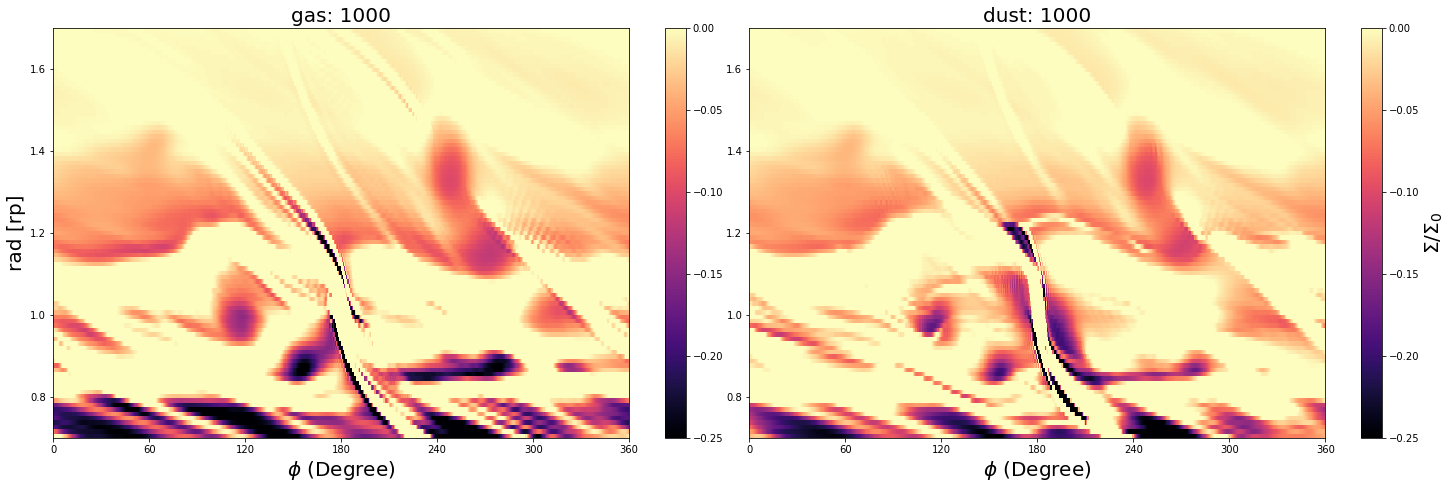

In [97]:
rossby(path, 'tap_wind_e3', '1000')

In [91]:
########### It took 30 minutes to run this cell ###########

name = ['tap_wind_e3', 'tap_wind_e4', 'tap_wind_e5', 'tap_wind_e6', 'wind_e3_new', 'wind_e4', 'wind_e5', 'wind_e6']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 1001)
    params = [(path, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        rossby(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(rossby, params)
            p.terminate()
        else:
            for param in params:
                rossby(param)

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

In [12]:
name = ['wind_e3_new']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 1001)
    params = [(path, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        rossby(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(rossby, params)
            p.terminate()
        else:
            for param in params:
                rossby(param)

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

In [109]:
def rossby(fpath, name, nf):
    
    kind = ['gas','dust1']
    arr  = []

    for k in kind:
        
        diff_rad = np.diff(rad_dat)         # do this for log scale w Jaehan
        diff_phi = np.diff(phi_dat)         # here, do this instead dr = rad_dat[1] - rad_dat[0]
                                            # dphi = phi_dat[1] - phi_dat[0]

        omega = np.sqrt(1/rad[:,None]**3)

        vr  = fromfile(f'{fpath}{name}/{k}vy{nf}.dat').reshape(ny,nx)
        vr0 = fromfile(f'{fpath}{name}/{k}vy0.dat').reshape(ny,nx)
        
        vphi  = fromfile(f'{fpath}{name}/{k}vx{nf}.dat').reshape(ny,nx)
        vphi0 = fromfile(f'{fpath}{name}/{k}vx0.dat').reshape(ny,nx)
        
        append = diff_rad[-1]*vphi[-1,:] - diff_rad[-1]*vphi0[-1,:]
        prepend = np.transpose(vr[:,-1]-vr0[:,-1])[:,None]
        
        first_term  = np.diff(rad[:,None]*vphi[:,:] - rad[:,None]*vphi0[:,:], axis=0, append=append[None,:]) 
        first_term /= (rad*diff_rad)[:,None]
        second_term = np.diff(vr[:,:] - vr0[:,:], axis=-1, prepend=prepend) / phi[None,:]
        
        del_v = (first_term - second_term) / rad[:,None]
        rossby = del_v / 2*omega
        
        arr.append(rossby)

    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6), sharey=True)
    
    for i, ax in zip(arr, axes.flat):
        rossby_plot = ax.pcolormesh(phi*180/np.pi + 90, rad, i, cmap= "magma")
    
        cmin = -0.15
        cmax = 0.0
        rossby_plot.set_clim([cmin, cmax])
        
        ax.set_ylim(0.8,1.8)
        ax.set_xlim(0,360)
        ax.set_xticks(np.arange(0, 420, step=60))
#         ax.set_aspect('equal')

        cbar = fig.colorbar(rossby_plot, ax=ax)
        fig.tight_layout(pad=0.05)
        
    axes[0].set_title(f'gas: {nf}', fontsize=20)
    axes[1].set_title(f'dust: {nf}', fontsize=20)
    axes[0].set_ylabel('rad [rp]', fontsize=20)
    axes[0].set_xlabel(r'$\phi$ (Degree)', fontsize=20)
    axes[1].set_xlabel(r'$\phi$ (Degree)', fontsize=20)  
#     cbar = fig.colorbar(rossby_plot, ax=axes[1:])
    cbar.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


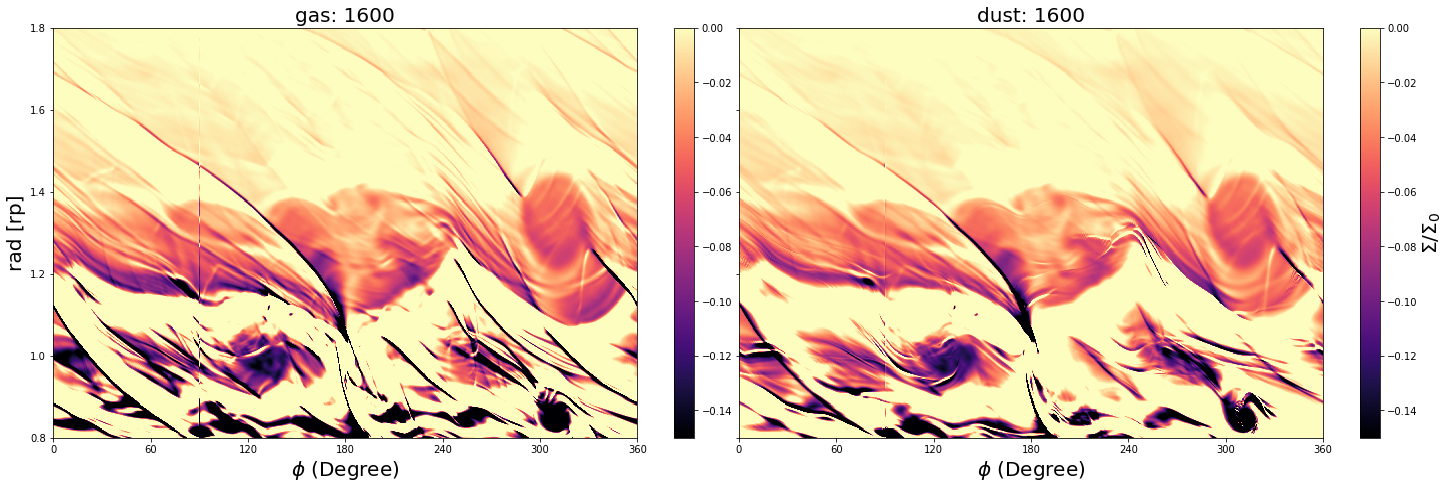

In [110]:
rossby(pathu, 'tapwind_jup_e3', '1600')

In [24]:
def rossby_movie(param):
    
    fpath, path, name, nf = param
    
    kind = ['gas','dust1']
    arr  = []

    for k in kind:
        
        diff_rad = np.diff(rad_dat)         # do this for log scale w Jaehan
        diff_phi = np.diff(phi_dat)         # here, do this instead dr = rad_dat[1] - rad_dat[0]
                                            # dphi = phi_dat[1] - phi_dat[0]

        omega = np.sqrt(1/rad[:,None]**3)

        vr  = fromfile(f'{fpath}{name}/{k}vy{nf}.dat').reshape(ny,nx)
        vr0 = fromfile(f'{fpath}{name}/{k}vy0.dat').reshape(ny,nx)
        
        vphi  = fromfile(f'{fpath}{name}/{k}vx{nf}.dat').reshape(ny,nx)
        vphi0 = fromfile(f'{fpath}{name}/{k}vx0.dat').reshape(ny,nx)
        
        append = diff_rad[-1]*vphi[-1,:] - diff_rad[-1]*vphi0[-1,:]
        prepend = np.transpose(vr[:,-1]-vr0[:,-1])[:,None]
        
        first_term  = np.diff(rad[:,None]*vphi[:,:] - rad[:,None]*vphi0[:,:], axis=0, append=append[None,:]) 
        first_term /= (rad*diff_rad)[:,None]
        second_term = np.diff(vr[:,:] - vr0[:,:], axis=-1, prepend=prepend) / phi[None,:]
        
        del_v = (first_term - second_term) / rad[:,None]
        rossby = del_v / 2*omega
        
        arr.append(rossby)

    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6), sharey=True)
    
    for i, ax in zip(arr, axes.flat):
        rossby_plot = ax.pcolormesh(phi*180/np.pi + 90, rad, i, cmap= "magma")
    
        cmin = -0.15
        cmax = 0.0
        rossby_plot.set_clim([cmin, cmax])
        
        ax.set_ylim(0.8,1.8)
        ax.set_xlim(0,360)
        ax.set_xticks(np.arange(0, 420, step=60))
#         ax.set_aspect('equal')

        cbar = fig.colorbar(rossby_plot, ax=ax)
        fig.tight_layout(pad=0.05)
        
    axes[0].set_title(f'gas: {nf}', fontsize=20)
    axes[1].set_title(f'dust: {nf}', fontsize=20)
    axes[0].set_ylabel('rad [rp]', fontsize=20)
    axes[0].set_xlabel(r'$\phi$ (Degree)', fontsize=20)
    axes[1].set_xlabel(r'$\phi$ (Degree)', fontsize=20)  
#     cbar = fig.colorbar(rossby_plot, ax=axes[1:])
    cbar.set_label(r'$\Sigma / \Sigma_{0}$', fontsize=20)

    plt.savefig(f'{path}{name}/rossby_{nf}.png', transparent=True, dpi=300, bbox_inches='tight') # dots per inch
    plt.close()

In [25]:
name = ['tapwind_jup_e4', 'tapwind_jup_e5', 'tapwind_jup_e6', 'tapwind_sat_e3', 'tapwind_sat_e4', 'tapwind_sat_e5', 'tapwind_sat_e6', 'halfsat_e3', 'halfsat_e4', 'halfsat_e5']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 2671, 10)
    params = [(pathu, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        rossby_movie(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(rossby_movie, params)
            p.terminate()
        else:
            for param in params:
                rossby_movie(param)
                
    base_path = f'{paths}{i}'
    base_name = 'rossby_'
    
    old_range = frame_range
    new_range = range(0, len(old_range))
    
    for (old_number, new_number) in zip(old_range, new_range):
            old_file = "%s/%s%d.png" % (base_path, base_name, old_number)
            tmp_file = "%s/tmp_%s%d.png" % (base_path, base_name, new_number)
            shutil.copyfile(old_file, tmp_file)

/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/software/opt/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

In [27]:
name = ['tapwind_jup_e3']

# input for parallel jobs for MassTaper torque and wind
for i in name:
    num_cores = 12
    frame_range = range(0, 2671, 10)
    params = [(pathu, paths, i, nf) for nf in frame_range]
    
    # Iterate through frames
    if len(frame_range) == 1:
        rossby_movie(params[0])
    else:
        if num_cores > 1:
            p = Pool(num_cores) # default number of processes is multiprocessing.cpu_count()
            p.map(rossby_movie, params)
            p.terminate()
        else:
            for param in params:
                rossby_movie(param)
                
    base_path = f'{paths}{i}'
    base_name = 'rossby_'
    
    old_range = frame_range
    new_range = range(0, len(old_range))
    
    for (old_number, new_number) in zip(old_range, new_range):
            old_file = "%s/%s%d.png" % (base_path, base_name, old_number)
            tmp_file = "%s/tmp_%s%d.png" % (base_path, base_name, new_number)
            shutil.copyfile(old_file, tmp_file)

In [98]:
diff_rad = np.diff(rad_dat)
diff_phi = np.diff(phi_dat)

rad2di = np.tile(rad,(ny,1))
rad2di = np.swapaxes(rad2di,0,1)

rad2d = np.tile(diff_rad,(ny,1))
rad2d = np.swapaxes(rad2d,0,1)
phi2d = np.tile(diff_phi,(nx,1))
phi2d = np.swapaxes(phi2d,0,1)

omega = np.sqrt(1/rad[:,None]**3)

vr  = fromfile(f'{path_tapwind_jup_e3}gasvy1000.dat').reshape(ny,nx)
vr0 = fromfile(f'{path_tapwind_jup_e3}gasvy0.dat').reshape(ny,nx)

vphi  = fromfile(f'{path_tapwind_jup_e3}gasvx1000.dat').reshape(ny,nx)
vphi0 = fromfile(f'{path_tapwind_jup_e3}gasvx0.dat').reshape(ny,nx)

print(f'omega: {omega.shape}')
print(f'diff v: {(vr[1] - vr0[1]).shape}')
print(f'diff phi: {(np.diff(phi)).shape}')
print(f'vphi: {vphi.shape}')
print(f'1st half rad2d[:,0:-1]*np.diff(rad2d): {(rad2d[:,0:-1]*np.diff(rad2d)).shape}')
print(f'rad2d: {rad2d.shape}')
print(f'rad2di: {rad2di.shape}')
print(f'phi2d: {phi2d[:,0:-1].shape}')
# print(f'rad2di[:,:]*rad2d[:,:]: {(rad2di[0:-1,0:-1]*rad2d[:,0:-1]).shape}')
# print(f'1st rad2d[:,0:-1]*vphi[:,0:-1] - rad2d[:,0:-1]*vphi0[:,0:-1]: {(np.diff(rad2d[:,:]*vphi[0:-1,:] - rad2d[:,:]*vphi0[0:-1,:])).shape}')
print(f'rad shape: {rad.shape}, phi shape: {phi.shape}')
print(f'vr shape: {vr.shape}, vr0 shape: {vr0[1].shape}')
print(f'vphi shape: {vphi.shape}, vphi0 shape: {vphi0[0].shape}')
print(f'np.diff(vr - vr0): {np.diff(vr[0:-1,:] - vr0[0:-1,:]).shape}')

print(f'rad: {rad.shape}')
print(f'diff_rad: {diff_rad.shape}')
print(f'vphi[]: {vphi[-1,:].shape}')
# print(f'1st of append: {(diff_rad*vphi[-1,:]).shape}')
# print(f'2nd of append: {(diff_rad*vphi0[-1,:]).shape}')

append = diff_rad[-1]*vphi[-1,:] - diff_rad[-1]*vphi0[-1,:]
print(f'append: {append.shape}')
prepend = np.transpose(vr[:,-1]-vr0[:,-1])[:,None]
print(f'prepend: {prepend.shape}')
print(f'vr[]: {vr[:,:].shape}')
print(f'vr0[]: {vr0[:,:].shape}')
print(f'vr[]-vr0[]: {(vr[:,:]-vr0[:,:]).shape}')
print(f'phi: {phi.shape}')
# print(f'1st_term: {first_term}')
# print(f'2nd_term: {second_term}')

first_term  = np.diff(rad[:,None]*vphi[:,:] - rad[:,None]*vphi0[:,:], axis=0, append=append[None,:]) 
first_term /= (rad*diff_rad)[:,None]
second_term = np.diff(vr[:,:] - vr0[:,:], axis=-1, prepend=prepend) / phi[None,:]

print(f'1st_term shape: {first_term.shape}')
print(f'2nd_term shape: {second_term.shape}')

del_v = (first_term - second_term) / rad[:,None]
rossby = del_v / 2*omega

print(f'del v: {del_v}')
print(f'rossby: {rossby}')

omega: (1024, 1)
diff v: (2048,)
diff phi: (2047,)
vphi: (1024, 2048)
1st half rad2d[:,0:-1]*np.diff(rad2d): (1024, 1023)
rad2d: (1024, 1024)
rad2di: (1024, 1024)
phi2d: (2048, 2047)
rad shape: (1024,), phi shape: (2048,)
vr shape: (1024, 2048), vr0 shape: (2048,)
vphi shape: (1024, 2048), vphi0 shape: (2048,)
np.diff(vr - vr0): (1023, 2047)
rad: (1024,)
diff_rad: (1024,)
vphi[]: (2048,)
append: (2048,)
prepend: (1024, 1)
vr[]: (1024, 2048)
vr0[]: (1024, 2048)
vr[]-vr0[]: (1024, 2048)
phi: (2048,)
1st_term shape: (1024, 2048)
2nd_term shape: (1024, 2048)
del v: [[-0.00174684 -0.00174944 -0.00175203 ... -0.001739   -0.00174162
  -0.00174424]
 [-0.00197296 -0.00197465 -0.00197621 ... -0.00196776 -0.00196954
  -0.00197129]
 [-0.00155231 -0.00155071 -0.00154855 ... -0.00155287 -0.00155339
  -0.00155317]
 ...
 [ 0.00018308  0.00018425  0.00018542 ...  0.00017957  0.00018075
   0.00018192]
 [ 0.0002063   0.00020743  0.00020856 ...  0.00020291  0.00020405
   0.00020518]
 [ 0.00309394  0.00315